# Data Generation

## Word Level 

In [44]:
import pandas
import fitz
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

### Splitting PDF into individual Pages

In [45]:
from utils import pdf_to_images

# pdf_to_images('data/word/1_raw/books/book1.pdf', 'data/word/2_splitted/books/book1')
# pdf_to_images('data/word/1_raw/books/book2.pdf', 'data/word/2_splitted/books/book2')
pdf_to_images('data/word/1_raw/books/book3.pdf', 'data/word/2_splitted/books/book3')
pdf_to_images('data/word/1_raw/books/book4.pdf', 'data/word/2_splitted/books/book4')
pdf_to_images('data/word/1_raw/books/book5.pdf', 'data/word/2_splitted/books/book5')
pdf_to_images('data/word/1_raw/books/book6.pdf', 'data/word/2_splitted/books/book6')
pdf_to_images('data/word/1_raw/books/book7.pdf', 'data/word/2_splitted/books/book7')
pdf_to_images('data/word/1_raw/books/book8.pdf', 'data/word/2_splitted/books/book8')

Processing complete! Saved 16 images in 'data/word/2_splitted/books/book3'.
Processing complete! Saved 6 images in 'data/word/2_splitted/books/book4'.
Processing complete! Saved 11 images in 'data/word/2_splitted/books/book5'.
Processing complete! Saved 9 images in 'data/word/2_splitted/books/book6'.
Processing complete! Saved 9 images in 'data/word/2_splitted/books/book7'.
Processing complete! Saved 11 images in 'data/word/2_splitted/books/book8'.


In [46]:
from utils import extract_text_by_page

for book in os.listdir("data/word/1_raw/transcripts"):
    docx_file = os.path.join("data/word/1_raw/transcripts", book)
    output_directory = os.path.join("data/word/2_splitted/transcripts", book.split(".")[0])
    extract_text_by_page(docx_file, output_directory)

Extracted 25 pages and saved them in 'data/word/2_splitted/transcripts\book1'.
Extracted 31 pages and saved them in 'data/word/2_splitted/transcripts\book2'.
Extracted 3 pages and saved them in 'data/word/2_splitted/transcripts\book3'.
Extracted 3 pages and saved them in 'data/word/2_splitted/transcripts\book4'.
Extracted 3 pages and saved them in 'data/word/2_splitted/transcripts\book5'.
Extracted 5 pages and saved them in 'data/word/2_splitted/transcripts\book6'.
Extracted 3 pages and saved them in 'data/word/2_splitted/transcripts\book7'.
Extracted 3 pages and saved them in 'data/word/2_splitted/transcripts\book8'.


### Transforming Images

In [47]:
from utils import (load_image, correct_skew, normalize_image, ensure_300ppi, remove_bleed_dual_layer, denoise_image, sharpen_image, enhance_contrast, morphological_operations, binarize_image, apply_binary_mask, add_fixed_padding)

def transform_images( image_path, output_path=None):
    results = {}

    image = load_image(image_path)
    results['original'] = image.copy()

    deskewed = correct_skew(image)
    results['deskewed'] = deskewed.copy()
    
    scaled = ensure_300ppi(deskewed)
    results['scaled'] = scaled.copy()

    return results


import os
import cv2
import shutil
from pathlib import Path

def process_books(input_dir, output_dir, transform_images):
    """Process all book images and save transformed versions."""

    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Iterate through each book directory
    for book in os.listdir(input_dir):
        book_path = os.path.join(input_dir, book)

        # Skip if not a directory
        if not os.path.isdir(book_path):
            continue

        print(f"Processing book: {book}")

        # Process each image in the book
        for image_name in os.listdir(book_path):
            # Skip non-image files
            if not image_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                continue

            # Extract page number from filename
            page_number = image_name.split('.')[0]
            image_path = os.path.join(book_path, image_name)

            # Define output path
            output_image_path = os.path.join(output_dir, f"{book}_{page_number}.png")

            try:
                # Apply transformation
                transformed_result = transform_images(image_path)
                final_image = transformed_result['deskewed']

                # Save transformed image (convert RGB to BGR for OpenCV)
                cv2.imwrite(output_image_path, cv2.cvtColor(final_image, cv2.COLOR_RGB2BGR))

            except Exception as e:
                print(f"  Error processing {image_name}: {str(e)}")
                

# Run the processing function
input_dir = "data/word/2_splitted/books"
output_dir = "data/word/3_transformed/images"

process_books(input_dir, output_dir, transform_images)

Processing book: book3
Processing book: book4
Processing book: book5
Processing book: book6
Processing book: book7
Processing book: book8


### Normalizing text

In [48]:
from utils import normalize_text_file

input_root = "data/word/2_splitted/transcripts"
output_root = "data/word/3_transformed/transcripts"
os.makedirs(output_root, exist_ok=True)

for book in os.listdir(input_root):
    book_dir = os.path.join(input_root, book)
    for page in os.listdir(book_dir):
        page_no = int(page.split("_")[1].split(".")[0])
        if page.lower().endswith(".txt"):
            input_path = os.path.join(book_dir, page)
            normalize_text_file(
                input_path= input_path,
                output_path= os.path.join(output_root, f"{book}_{page_no}.txt")
                )

### Detecting Bounding Boxes


In [49]:
import os

input_root = "data/word/3_transformed/images"
transcripts_root = "data/word/3_transformed/transcripts"
output_root = "data/word/4_bounding_boxes//"

os.makedirs(output_root, exist_ok=True)

!python CRAFT-pytorch/test.py \
--trained_model=CRAFT-pytorch/weights/craft_mlt_25k.pth \
--result_folder={output_root} \
--test_folder={input_root} \



c:\Users\sarth\anaconda3\envs\imageGeneration\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\sarth\anaconda3\envs\imageGeneration\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


### Mapping bounding boxes with corresponding transcript word

In [50]:
from utils import process_all_files

process_all_files(
    image_dir="data/word/3_transformed/images",
    bbox_dir="data/word/4_bounding_boxes",
    transcript_dir="data/word/3_transformed/transcripts",
    output_dir="data/word/5_mapped",
    tesseract_model=1,
    similarity_threshold=0.8
)

Processing files in data/word/3_transformed/images...
File book3_1: Found 129 words in transcript file, mapped 61 of 288 bounding boxes
File book3_2: Found 439 words in transcript file, mapped 255 of 405 bounding boxes
File book3_3: Found 370 words in transcript file, mapped 176 of 351 bounding boxes
File book4_1: Found 352 words in transcript file, mapped 203 of 351 bounding boxes
File book4_2: Found 130 words in transcript file, mapped 69 of 321 bounding boxes
File book4_3: Found 363 words in transcript file, mapped 168 of 353 bounding boxes
File book5_1: Found 125 words in transcript file, mapped 90 of 121 bounding boxes
File book5_2: Found 156 words in transcript file, mapped 101 of 155 bounding boxes
File book5_3: Found 167 words in transcript file, mapped 124 of 167 bounding boxes
File book6_1: Found 169 words in transcript file, mapped 124 of 184 bounding boxes
File book6_2: Found 112 words in transcript file, mapped 87 of 159 bounding boxes
File book6_3: Found 282 words in tran

### Creating Dataset of words images and labels

In [51]:
import pandas as pd
import os
from utils import extract_and_save_regions

image_root = "data/word/3_transformed/images"
aligned_root = "data/word/5_mapped"
output_root = "data/word/6_word_data/images"
os.makedirs(output_root, exist_ok=True)

df_records = []
global_index = 0

for image in os.listdir(aligned_root):
    image_path = os.path.join(image_root, image.replace("_mapped.txt", ".png"))
    aligned_path = os.path.join(aligned_root, image)

    results, global_index = extract_and_save_regions(image_path, aligned_path, output_root, global_index)
    df_records.extend(results)

df = pd.DataFrame(df_records, columns=["Image", "label"])

df.to_csv("data/word/6_word_data/words.csv", index=False)

### Resizing and padding 

In [52]:
from PIL import Image
import os
from utils import resize_and_pad

target_height, target_width = 128,384  # Adjust based on your dataset
# Resize with aspect ratio preservation and pad

for image in os.listdir("data/word/6_word_data/images"):
    img = Image.open(f"data/word/6_word_data/images/{image}")
    processed_img = resize_and_pad(img, target_height, target_width, output_dir="data/word/train/target")

### Rendering Latex Source images

In [53]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib
from PIL import Image
import io
import os
from tqdm import tqdm

# Configure matplotlib to use its built-in math renderer
matplotlib.rcParams.update({
    'text.usetex': False,  # Disable LaTeX
    'mathtext.fontset': 'cm',  # Use Computer Modern font (similar to LaTeX)
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],  # Renaissance-like font
    'font.weight': 'bold',
    'mathtext.bf': 'bold',  # Bold math
})

# Load your dataframe
df = pd.read_csv('data/word/6_word_data/words.csv')
os.makedirs('data/word/train/source', exist_ok=True)
output_dir = Path('data/word/train/source')

def render_input_words(word, output_path, width=384, height=128):
    """Render text with classic styling using matplotlib's built-in math renderer"""
    # Create a figure with exact pixel dimensions
    dpi = 150
    figsize = (width/dpi, height/dpi)
    fig = plt.figure(figsize=figsize, dpi=dpi)
    
    # Create axis that fills the figure
    ax = fig.add_axes([0, 0, 1, 1])
    
    # Determine fontsize based on word length to fill the width
    base_fontsize = 70  # Larger to compensate for the lack of LaTeX boldness
    length_adjustment = max(1, min(15, len(word))) / 7.0
    fontsize = int(base_fontsize / length_adjustment)
    
    # For text styling, use mathtext notation to get Renaissance-like appearance
    math_text = f"$\\mathbf{{{word}}}$"
    
    # Render the text with bold style
    ax.text(0.5, 0.5, math_text, 
            fontsize=fontsize, 
            ha='center', va='center',
            fontweight='bold')
    
    ax.axis('off')
    
    # Save directly to a buffer with tight bbox
    buf = io.BytesIO()
    fig.savefig(buf, format='png', bbox_inches='tight', 
                pad_inches=0.05, facecolor='white')
    plt.close(fig)
    buf.seek(0)
    
    # Open the buffer as an image
    img = Image.open(buf)
    img = img.convert('RGB')
    
    # Create a new white image of the exact size
    final_img = Image.new('RGB', (width, height), (255, 255, 255))
    
    # Resize the image to fill most of the frame
    img_width, img_height = img.size
    scale = min(width*0.9 / img_width, height*0.9 / img_height)
    new_width = int(img_width * scale)
    new_height = int(img_height * scale)
    
    resample_method = Image.LANCZOS if hasattr(Image, 'LANCZOS') else Image.ANTIALIAS
    resized_img = img.resize((new_width, new_height), resample_method)
    
    # Center the image
    x_offset = (width - new_width) // 2
    y_offset = (height - new_height) // 2
    
    # Paste the resized image onto the white background
    final_img.paste(resized_img, (x_offset, y_offset))
    
    # Save the final image
    final_img.save(output_path)
    return output_path

# Process each word in the dataframe with tqdm progress bar
source_paths = []

# Check if 'Image' column exists in dataframe
if 'Image' in df.columns:
    for index, row in tqdm(df.iterrows(), total=len(df), desc="Rendering expressions"):
        word = row['label']
        output_path = output_dir / row['Image']
        
        try:
            source_path = render_input_words(word, output_path)
            source_paths.append(str(source_path))
        except Exception as e:
            print(f"Error processing {word}: {str(e)}")
            # If rendering fails, create an empty white image as fallback
            empty_img = Image.new('RGB', (384, 128), (255, 255, 255))
            empty_img.save(output_path)
            source_paths.append(str(output_path))
else:
    # Use safe filenames if 'Image' column doesn't exist
    for index, row in tqdm(df.iterrows(), total=len(df), desc="Rendering expressions"):
        word = row['label']
        # Create safe filename
        safe_filename = "".join([c if c.isalnum() or c in "_-" else "_" for c in word])
        output_path = output_dir / f"{safe_filename}.png"
        
        try:
            source_path = render_input_words(word, output_path)
            source_paths.append(str(source_path))
        except Exception as e:
            print(f"Error processing {word}: {str(e)}")
            # If rendering fails, create an empty white image as fallback
            empty_img = Image.new('RGB', (384, 128), (255, 255, 255))
            empty_img.save(output_path)
            source_paths.append(str(output_path))

# Update the dataframe
df['source_path'] = source_paths
df.to_csv('data/word/train/data.csv', index=False)

print(f"Generated {len(source_paths)} images.")

Rendering expressions: 100%|██████████| 2925/2925 [03:21<00:00, 14.54it/s]  

Generated 2925 images.


In [54]:
df['Image'] = "data/word/train/target/" + df['Image']
df['source_path'] = df['source_path'].apply(lambda x: x.replace("\\", "/"))
df.rename(columns={"Image": "target_path"}, inplace=True)
df = df[["source_path","target_path", "label"]]
df.to_csv("data/word/train/data.csv", index=False)

In [55]:
df.head()

,source_path,target_path,label
0,data/word/train/source/image0.png,data/word/train/target/image0.png,esta
1,data/word/train/source/image1.png,data/word/train/target/image1.png,es
2,data/word/train/source/image2.png,data/word/train/target/image2.png,El
3,data/word/train/source/image3.png,data/word/train/target/image3.png,el
4,data/word/train/source/image4.png,data/word/train/target/image4.png,Ana


## Page Level

In [ ]:
from utils import pdf_to_images

pdf_to_images('data/page/1_raw/books/book1.pdf', 'data/page/2_splitted/books/book1')
pdf_to_images('data/page/1_raw/books/book2.pdf', 'data/page/2_splitted/books/book2')
pdf_to_images('data/page/1_raw/books/book3.pdf', 'data/page/2_splitted/books/book3')
pdf_to_images('data/page/1_raw/books/book4.pdf', 'data/page/2_splitted/books/book4')
pdf_to_images('data/page/1_raw/books/book5.pdf', 'data/page/2_splitted/books/book5')
pdf_to_images('data/page/1_raw/books/book6.pdf', 'data/page/2_splitted/books/book6')
pdf_to_images('data/page/1_raw/books/book7.pdf', 'data/page/2_splitted/books/book7')
pdf_to_images('data/page/1_raw/books/book8.pdf', 'data/page/2_splitted/books/book8')

In [ ]:
from utils import extract_text_by_page

for book in os.listdir("data/page/1_raw/transcripts"):
    docx_file = os.path.join("data/page/1_raw/transcripts", book)
    output_directory = os.path.join("data/page/2_splitted/transcripts", book.split(".")[0])
    extract_text_by_page(docx_file, output_directory)

In [2]:
from utils import (load_image, correct_skew, normalize_image, ensure_300ppi, remove_bleed_dual_layer, denoise_image, sharpen_image, enhance_contrast, morphological_operations, binarize_image, apply_binary_mask, add_fixed_padding)

def transform_images( image_path, output_path=None):
    results = {}

    image = load_image(image_path)
    results['original'] = image.copy()

    deskewed = correct_skew(image)
    results['deskewed'] = deskewed.copy()

    normalized = normalize_image(deskewed)
    results['normalized'] = normalized.copy()

    scaled = ensure_300ppi(normalized)
    results['scaled'] = scaled.copy()

    if output_path:
        os.makedirs(output_path, exist_ok=True)
        cv2.imwrite(output_path, scaled)
    
    return results


import os
import cv2
import shutil
from pathlib import Path

def process_books(input_dir, output_dir, transform_images):
    """Process all book images and save transformed versions."""

    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Iterate through each book directory
    for book in os.listdir(input_dir):
        book_path = os.path.join(input_dir, book)

        # Skip if not a directory
        if not os.path.isdir(book_path):
            continue

        print(f"Processing book: {book}")

        # Process each image in the book
        for image_name in os.listdir(book_path):
            # Skip non-image files
            if not image_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                continue

            # Extract page number from filename
            page_number = image_name.split('.')[0]
            image_path = os.path.join(book_path, image_name)

            # Define output path
            output_image_path = os.path.join(output_dir, f"{book}_{page_number}.png")

            try:
                # Apply transformation
                transformed_result = transform_images(image_path)
                final_image = transformed_result['scaled']

                # Save transformed image (convert RGB to BGR for OpenCV)
                cv2.imwrite(output_image_path, cv2.cvtColor(final_image, cv2.COLOR_RGB2BGR))

            except Exception as e:
                print(f"  Error processing {image_name}: {str(e)}")
                

# Run the processing function
input_dir = "data/page/2_splitted/books"
output_dir = "data/page/3_transformed/images"

process_books(input_dir, output_dir, transform_images)

import shutil

src_dir = "data/page/2_splitted/transcripts"
dst_dir = "data/page/3_transformed/transcripts"

shutil.copytree(src_dir, dst_dir)


Processing book: book1
Processing book: book2
Processing book: book3
Processing book: book4
Processing book: book5
Processing book: book6
Processing book: book7
Processing book: book8


'data/page/3_transformed/transcripts'

In [3]:
from PIL import Image

from utils import resize_and_pad

target_height, target_width = 4096,3084  # Adjust based on your dataset
# Resize with aspect ratio preservation and pad

for image in os.listdir("data/page/3_transformed/images"):
    img = Image.open(f"data/page/3_transformed/images/{image}")
    processed_img = resize_and_pad(img, target_height, target_width, output_dir="data/page/train/target")

In [62]:
import os
import io
import matplotlib
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image
from tqdm import tqdm
import pandas as pd
import unicodedata

# Configure matplotlib to use its built-in math renderer
matplotlib.rcParams.update({
    'text.usetex': False,  # Disable LaTeX
    'mathtext.fontset': 'cm',  # Use Computer Modern font (similar to LaTeX)
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],  # Renaissance-like font
    'axes.unicode_minus': True,  # Properly handle minus signs
    'font.size': 18,  # Base font size
    'figure.figsize': (8.5, 11),
})

def render_page_with_matplotlib(text_content, output_path, width=4096, height=3084):
    """
    Render a full page of text using matplotlib's math renderer with centered text
    and proper margins. Preserves exact content formatting from the transcript file.
    
    Args:
        text_content: String of text content
        output_path: Path to save the rendered image
        width, height: Dimensions of the output image
    """
    # Create figure with exact dimensions
    dpi = 300
    figsize = (width/dpi, height/dpi)
    fig = plt.figure(figsize=figsize, dpi=dpi)
    
    # Create axis with minimal margins to maximize text space
    margin = 0.05  # Reduced margin size to allow more text space
    ax = fig.add_axes([margin, margin, 1-2*margin, 1-2*margin])
    
    # Fixed font size as requested
    font_size = 50
    
    # Count total lines to calculate appropriate line spacing
    total_lines = text_content.count('\n') + 1
    
    # Dynamic line spacing based on content length to fill the page
    # More content = tighter spacing to fit everything
    if total_lines > 40:
        line_height = 0.020  # Smaller line height for content-heavy pages
        paragraph_spacing = 0.010
    elif total_lines > 30:
        line_height = 0.025
        paragraph_spacing = 0.012
    elif total_lines > 20:
        line_height = 0.035
        paragraph_spacing = 0.015
    else:
        line_height = 0.045  # Larger spacing for pages with less content
        paragraph_spacing = 0.020
    
    # Split content into paragraphs exactly as in the file
    paragraphs = text_content.split('\n\n')
    
    # Start from top
    y_position = 0.98
    
    for paragraph in paragraphs:
        if paragraph.strip():
            # Handle mathematical text if present
            if '$' in paragraph:
                # Process as math text
                paragraph = paragraph.replace('$', '$')  # Ensure proper formatting
            
            # Add the paragraph text with centered alignment
            ax.text(0.5, y_position, paragraph,
                    horizontalalignment='center',  # Center-align text
                    verticalalignment='top',
                    wrap=True,
                    fontsize=font_size,  # Fixed font size as requested
                    transform=ax.transAxes,
                    linespacing=1.2)  # Slightly adjusted line spacing
            
            # Calculate paragraph height based on actual line breaks in the file
            lines_in_paragraph = 1 + paragraph.count('\n')
            
            # Move down for next paragraph with proper spacing
            y_position -= (line_height * lines_in_paragraph + paragraph_spacing)
    
    ax.axis('off')
    
    # Save the figure with high quality
    fig.savefig(output_path, format='png', 
                bbox_inches='tight', 
                pad_inches=0.05,  # Minimal padding
                facecolor='white', 
                dpi=dpi)
    plt.close(fig)
    
    # Load the saved image to ensure it has the exact expected dimensions
    img = Image.open(output_path)
    img = img.convert('RGB')
    
    # Create a new white image with the exact target dimensions
    new_img = Image.new('RGB', (width, height), (255, 255, 255))
    
    # Calculate target dimensions with minimal margins
    target_width = int(width * (1 - 2*margin))
    target_height = int(height * (1 - 2*margin))
    
    # Calculate scaling factor to maintain aspect ratio
    img_aspect = img.width / img.height
    target_aspect = target_width / target_height
    
    if img_aspect > target_aspect:
        # Image is wider than target area
        new_width = target_width
        new_height = int(new_width / img_aspect)
    else:
        # Image is taller than target area
        new_height = target_height
        new_width = int(new_height * img_aspect)
    
    # Resize image
    resample_method = Image.LANCZOS if hasattr(Image, 'LANCZOS') else Image.ANTIALIAS
    img_resized = img.resize((new_width, new_height), resample_method)
    
    # Calculate position to center the image within margins
    x_offset = (width - new_width) // 2
    y_offset = (height - new_height) // 2
    
    # Paste the resized image onto the white background
    new_img.paste(img_resized, (x_offset, y_offset))
    new_img.save(output_path)
    
    return output_path

def preprocess_text_for_special_chars(text):
    """
    Preprocess text to handle special characters properly
    """
    # Replace common problematic characters
    replacements = {
        '—': '-',  # em dash
        '–': '-',  # en dash
        ''': "'",  # smart quotes
        ''': "'",
        '"': '"',
        '"': '"',
        '…': '...',
        '•': '*',
        '′': "'",
        '″': '"',
        '°': 'deg',
    }
    
    for old, new in replacements.items():
        text = text.replace(old, new)
    
    # Ensure all characters are valid
    valid_chars = []
    for char in text:
        if unicodedata.category(char)[0] in ('L', 'N', 'P', 'S', 'Z') or char in ' \n\t':
            valid_chars.append(char)
        else:
            # Replace unknown characters with a placeholder
            valid_chars.append('?')
    
    return ''.join(valid_chars)

def process_transcript_files(transcript_dir, output_dir, width=4096, height=3084):
    """
    Process all transcript files in a directory and render them as pages
    
    Args:
        transcript_dir: Directory containing .txt transcript files
        output_dir: Directory to save rendered images
        width, height: Dimensions of output images
    """
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    # Find all transcript files
    transcript_files = list(Path(transcript_dir).glob('*.txt'))
    
    book_name = os.path.basename(transcript_dir)
    print(f"Processing book: {book_name}")
    
    # Process each file
    output_paths = []
    
    for txt_file in tqdm(transcript_files, desc=f"Rendering pages for {book_name}"):
        # Read the transcript
        with open(txt_file, 'r', encoding='utf-8') as f:
            content = f.read()
        
        # Preprocess text for better special character handling
        content = preprocess_text_for_special_chars(content)
        
        # Extract page number from filename
        try:
            page_no = int(txt_file.stem.split("_")[1])
        except (IndexError, ValueError):
            # Fallback if filename doesn't follow expected pattern
            page_no = txt_file.stem
            
        # Determine output path
        output_filename = f"{book_name}_{page_no}.png"
        output_path = Path(output_dir) / output_filename
        
        try:
            # Render the page
            rendered_path = render_page_with_matplotlib(content, output_path, width, height)
            output_paths.append(str(rendered_path))
        except Exception as e:
            print(f"Error processing {txt_file}: {str(e)}")
            # Create empty white image as fallback
            empty_img = Image.new('RGB', (width, height), (255, 255, 255))
            empty_img.save(output_path)
            output_paths.append(str(output_path))
    
    return output_paths, book_name

if __name__ == "__main__":
    # Configuration
    TRANSCRIPT_DIR_ROOT = "data/page/3_transformed/transcripts"  # Root directory with book subdirectories
    OUTPUT_DIR = "data/page/train/source"  # Output directory for rendered images
    
    # Set dimensions for page rendering (swapped to match your comment)
    WIDTH = 3084
    HEIGHT = 4096
    
    # Create output directory if it doesn't exist
    os.makedirs(OUTPUT_DIR, exist_ok=True)
    
    all_output_paths = []
    all_transcript_files = []
    
    # Process each book directory
    for book_name in os.listdir(TRANSCRIPT_DIR_ROOT):
        book_dir = os.path.join(TRANSCRIPT_DIR_ROOT, book_name)
        
        # Skip if not a directory
        if not os.path.isdir(book_dir):
            continue
            
        # Process all transcript files in this book
        output_paths, book_name = process_transcript_files(book_dir, OUTPUT_DIR, WIDTH, HEIGHT)
        
        # Store paths for CSV
        all_output_paths.extend(output_paths)
        all_transcript_files.extend([f"{book_name}/{Path(p).stem}.txt" for p in output_paths])
    
    # Save paths to a CSV file
    df = pd.DataFrame({
        'source_path': all_output_paths
    })
    df.to_csv('data/page/train/data.csv', index=False)
    
    print(f"Generated {len(all_output_paths)} page images across all books.")

Processing book: book1


Rendering pages for book1: 100%|██████████| 25/25 [00:38<00:00,  1.53s/it]


Processing book: book2


Rendering pages for book2: 100%|██████████| 31/31 [00:51<00:00,  1.68s/it]


Processing book: book3


Rendering pages for book3: 100%|██████████| 3/3 [00:08<00:00,  2.79s/it]


Processing book: book4


Rendering pages for book4: 100%|██████████| 3/3 [00:07<00:00,  2.63s/it]


Processing book: book5


Rendering pages for book5: 100%|██████████| 3/3 [00:05<00:00,  1.79s/it]


Processing book: book6


Rendering pages for book6: 100%|██████████| 5/5 [00:12<00:00,  2.49s/it]


Processing book: book7


Rendering pages for book7: 100%|██████████| 3/3 [00:07<00:00,  2.60s/it]


Processing book: book8


Rendering pages for book8: 100%|██████████| 3/3 [00:05<00:00,  1.98s/it]

Generated 76 page images across all books.


In [16]:
df['target_path'] = df['source_path'].apply(lambda x: x.replace("source", "target").replace("\\", "/"))
df['source_path'] = df['source_path'].apply(lambda x: x.replace("\\", "/"))
df.to_csv("data/page/train/data.csv", index=False)

In [17]:
df.head()

,source_path,target_path
0,data/page/train/source/book1_1.png,data/page/train/target/book1_1.png
1,data/page/train/source/book1_10.png,data/page/train/target/book1_10.png
2,data/page/train/source/book1_11.png,data/page/train/target/book1_11.png
3,data/page/train/source/book1_12.png,data/page/train/target/book1_12.png
4,data/page/train/source/book1_13.png,data/page/train/target/book1_13.png


# Model Building

## Importing Dependencies

In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
import torchvision
import seaborn as sns
import torch
import matplotlib.gridspec as gridspec
import torch.nn as nn
import torch.optim as optim
import matplotlib
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from torchvision.utils import make_grid, save_image
from PIL import Image
from torchinfo import summary
from torch.nn.utils import spectral_norm
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Set random seed for reproducibility
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


## Initializing Parameter

In [7]:
# Hyperparameters - Modified Values
BATCH_SIZE = 16
LEARNING_RATE_G = 0.0001  # Decreased from 0.0002
LEARNING_RATE_D = 0.00005  # Decreased from 0.0001
BETA1 = 0.5
BETA2 = 0.999
NUM_EPOCHS = 250
LAMBDA_L1 = 100
LAMBDA_GP = 10
IMG_SIZE = (128, 384)
PATIENCE = 30  # Increased from 20

# Paths
GAN_CHECKPOINT_DIR = 'GAN_output/checkpoints'
GAN_RESULTS_DIR = 'GAN_output/results'
os.makedirs(GAN_CHECKPOINT_DIR, exist_ok=True)
os.makedirs(GAN_RESULTS_DIR, exist_ok=True)
os.makedirs(os.path.join(GAN_RESULTS_DIR, 'model_architecture'), exist_ok=True)
os.makedirs(os.path.join(GAN_RESULTS_DIR, 'test'), exist_ok=True)

## Dataset

In [8]:
class WordImageDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform
        
    def __len__(self):
        return len(self.dataframe)
    
    def __getitem__(self, idx):
        source_path = self.dataframe.iloc[idx]['source_path']
        target_path = self.dataframe.iloc[idx]['target_path']
        label = self.dataframe.iloc[idx]['label']
        
        source_img = Image.open(source_path).convert('RGB')
        target_img = Image.open(target_path).convert('RGB')
        
        if self.transform:
            source_img = self.transform(source_img)
            target_img = self.transform(target_img)
            
        return {'source': source_img, 'target': target_img, 'label': label}


## U-Net

In [9]:
class AdaptiveResidualBlock(nn.Module):
    def __init__(self, channels, kernel_size=3):
        super(AdaptiveResidualBlock, self).__init__()
        self.block = nn.Sequential(
            nn.Conv2d(channels, channels, kernel_size, 1, kernel_size//2, bias=False),
            nn.InstanceNorm2d(channels, affine=True),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(channels, channels, kernel_size, 1, kernel_size//2, bias=False),
            nn.InstanceNorm2d(channels, affine=True)
        )
        self.relu = nn.LeakyReLU(0.2, inplace=True)
        
    def forward(self, x):
        return self.relu(x + self.block(x))

class SelfAttention(nn.Module):
    def __init__(self, in_channels):
        super(SelfAttention, self).__init__()
        self.query = nn.Conv2d(in_channels, in_channels//4, 1)  # Increased attention capacity
        self.key = nn.Conv2d(in_channels, in_channels//4, 1)
        self.value = nn.Conv2d(in_channels, in_channels, 1)
        self.gamma = nn.Parameter(torch.zeros(1))
        
    def forward(self, x):
        batch_size, C, width, height = x.size()
        
        proj_query = self.query(x).view(batch_size, -1, width*height).permute(0, 2, 1)
        proj_key = self.key(x).view(batch_size, -1, width*height)
        energy = torch.bmm(proj_query, proj_key)
        # Scaling for more stable gradients
        attention = torch.softmax(energy / (C**0.5), dim=-1)
        
        proj_value = self.value(x).view(batch_size, -1, width*height)
        out = torch.bmm(proj_value, attention.permute(0, 2, 1))
        out = out.view(batch_size, C, width, height)
        
        return self.gamma*out + x

# Generator Block
class UNetBlock(nn.Module):
    def __init__(self, in_channels, out_channels, downsample=True, use_dropout=False):
        super(UNetBlock, self).__init__()
        if downsample:
            self.conv = nn.Conv2d(in_channels, out_channels, 4, 2, 1, bias=False)
            self.activation = nn.LeakyReLU(0.2)
        else:
            self.conv = nn.ConvTranspose2d(in_channels, out_channels, 4, 2, 1, bias=False)
            self.activation = nn.ReLU()
        self.use_dropout = use_dropout
        self.dropout = nn.Dropout(0.5)
        self.norm = nn.InstanceNorm2d(out_channels, affine=True)
        
    def forward(self, x):
        x = self.conv(x)
        x = self.norm(x)
        if self.use_dropout:
            x = self.dropout(x)
        x = self.activation(x)
        return x
    
    
# Horizontal bias for text feature extraction
class UNetBlockHorizontal(nn.Module):
    def __init__(self, in_channels, out_channels, downsample=True, use_dropout=False):
        super(UNetBlockHorizontal, self).__init__()
        if downsample:
            # For text, use asymmetric convolution to focus on horizontal patterns
            self.conv = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=(3, 5), stride=2, padding=(1, 2), bias=False),
                nn.Conv2d(out_channels, out_channels, kernel_size=(5, 3), stride=1, padding=(2, 1), bias=False)
            )
            self.activation = nn.LeakyReLU(0.2)
        else:
            self.conv = nn.Sequential(
                nn.ConvTranspose2d(in_channels, out_channels, kernel_size=4, stride=2, padding=1, bias=False),
                nn.Conv2d(out_channels, out_channels, kernel_size=(5, 3), stride=1, padding=(2, 1), bias=False)
            )
            self.activation = nn.ReLU()
        self.use_dropout = use_dropout
        self.dropout = nn.Dropout(0.5)
        self.norm = nn.InstanceNorm2d(out_channels, affine=True)
        
    def forward(self, x):
        x = self.conv(x)
        x = self.norm(x)
        if self.use_dropout:
            x = self.dropout(x)
        x = self.activation(x)
        return x

# Dilated residual block for wider context
class DilatedResidualBlock(nn.Module):
    def __init__(self, channels, dilation_rate):
        super(DilatedResidualBlock, self).__init__()
        self.block = nn.Sequential(
            nn.Conv2d(channels, channels, 3, 1, padding=dilation_rate, dilation=dilation_rate, bias=False),
            nn.InstanceNorm2d(channels, affine=True),
            nn.ReLU(inplace=True),
            nn.Conv2d(channels, channels, 3, 1, padding=dilation_rate, dilation=dilation_rate, bias=False),
            nn.InstanceNorm2d(channels, affine=True)
        )
        self.relu = nn.ReLU(inplace=True)
        
    def forward(self, x):
        return self.relu(x + self.block(x))

# Skip connection with feature refinement
class SkipConnectionRefine(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(SkipConnectionRefine, self).__init__()
        self.refine = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, 1, 1, 0, bias=False),
            nn.InstanceNorm2d(out_channels, affine=True),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, 3, 1, 1, bias=False),
            nn.InstanceNorm2d(out_channels, affine=True)
        )
        
    def forward(self, x):
        return self.refine(x)

## Generator

In [10]:
# Enhanced Generator for Text Generation
class EnhancedTextGenerator(nn.Module):
    def __init__(self, in_channels=3, out_channels=3):
        super(EnhancedTextGenerator, self).__init__()
        
        # Initial layer - no normalization
        self.initial = nn.Sequential(
            nn.Conv2d(in_channels, 64, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2)
        )
        
        # Text-optimized encoder with horizontal bias (for text features)
        self.encoder1 = UNetBlockHorizontal(64, 128)      # Text-aware block
        self.encoder2 = UNetBlockHorizontal(128, 256)     # Text-aware block
        self.encoder3 = UNetBlock(256, 384)     # Standard block 
        self.encoder4 = UNetBlock(384, 512)     # Standard block
        
        # Multiple attention layers at different scales
        self.attention_high = SelfAttention(128)  # High-level features (fine details)
        self.attention_mid = SelfAttention(256)   # Mid-level features
        self.attention_low = SelfAttention(384)   # Low-level features (shapes)
        
        # Residual bottleneck with dilated convolutions for wider context
        self.bottleneck = nn.Sequential(
            DilatedResidualBlock(512, 1),
            DilatedResidualBlock(512, 2),
            DilatedResidualBlock(512, 4)
        )
        
        # Improved skip connections with feature refinement
        self.skip_refine1 = SkipConnectionRefine(512, 512)
        self.skip_refine2 = SkipConnectionRefine(384, 384)
        self.skip_refine3 = SkipConnectionRefine(256, 256)
        self.skip_refine4 = SkipConnectionRefine(128, 128)
        self.skip_refine5 = SkipConnectionRefine(64, 64)
        
        # Decoder with text-aware blocks for horizontal features
        self.decoder1 = UNetBlock(512, 384, False, True)
        self.decoder2 = UNetBlockHorizontal(768, 256, False, True)  # Text-aware block
        self.decoder3 = UNetBlockHorizontal(512, 128, False)        # Text-aware block
        self.decoder4 = UNetBlock(256, 64, False)
        
        # Final layer with enhanced details
        self.final = nn.Sequential(
            nn.ConvTranspose2d(128, 64, 4, 2, 1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, out_channels, 3, 1, 1),
            nn.Tanh()
        )
        
    def forward(self, x):
        # Encoder path
        e0 = self.initial(x)
        
        e1 = self.encoder1(e0)
        e1 = self.attention_high(e1)  # Apply attention at high-resolution features
        
        e2 = self.encoder2(e1)
        e2 = self.attention_mid(e2)   # Apply attention at mid-resolution features
        
        e3 = self.encoder3(e2)
        e3 = self.attention_low(e3)   # Apply attention at low-resolution features
        
        e4 = self.encoder4(e3)
        
        # Bottleneck with dilated convolutions for wider receptive field
        b = self.bottleneck(e4)
        
        # Decoder with refined skip connections
        d1 = self.decoder1(b)
        d2 = self.decoder2(torch.cat([d1, self.skip_refine2(e3)], 1))
        d3 = self.decoder3(torch.cat([d2, self.skip_refine3(e2)], 1))
        d4 = self.decoder4(torch.cat([d3, self.skip_refine4(e1)], 1))
        
        # Final layer with enhanced details
        out = self.final(torch.cat([d4, self.skip_refine5(e0)], 1))
        
        return out

## Discriminator

In [11]:
class TextDiscriminator(nn.Module):
    def __init__(self, in_channels=6):
        super(TextDiscriminator, self).__init__()
        
        # Initial layer with horizontal feature extraction
        self.initial = nn.Sequential(
            spectral_norm(nn.Conv2d(in_channels, 64, kernel_size=(3, 5), stride=2, padding=(1, 2), bias=False)),
            nn.LeakyReLU(0.2)
        )
        
        # Mid layers with spectral normalization and multi-scale features
        self.layer1 = nn.Sequential(
            spectral_norm(nn.Conv2d(64, 128, 4, 2, 1, bias=False)),
            nn.InstanceNorm2d(128, affine=True),
            nn.LeakyReLU(0.2)
        )
        
        self.layer2 = nn.Sequential(
            spectral_norm(nn.Conv2d(128, 256, 4, 2, 1, bias=False)),
            nn.InstanceNorm2d(256, affine=True),
            nn.LeakyReLU(0.2)
        )
        
        self.layer3 = nn.Sequential(
            spectral_norm(nn.Conv2d(256, 512, 4, 2, 1, bias=False)),
            nn.InstanceNorm2d(512, affine=True),
            nn.LeakyReLU(0.2)
        )
        
        # Text-aware attention module
        self.attention = SelfAttention(256)
        
        # Multi-scale discrimination with different patch sizes
        self.output_small = spectral_norm(nn.Conv2d(512, 1, 3, 1, 1, bias=False))
        self.output_medium = spectral_norm(nn.Conv2d(256, 1, 3, 1, 1, bias=False))
        self.output_large = spectral_norm(nn.Conv2d(128, 1, 3, 1, 1, bias=False))
        
    def forward(self, source, target):
        x = torch.cat([source, target], 1)
        
        # Feature extraction 
        x0 = self.initial(x)
        x1 = self.layer1(x0)
        x2 = self.layer2(x1)
        x2 = self.attention(x2)  # Apply attention to mid-level features
        x3 = self.layer3(x2)
        
        # Multi-scale outputs (PatchGAN at different scales)
        out_small = self.output_small(x3)            # Smallest patches
        out_medium = self.output_medium(x2)          # Medium patches
        out_large = self.output_large(x1)            # Largest patches
        
        return out_small, out_medium, out_large

In [12]:
# VGG Perceptual Loss
class VGGLoss(nn.Module):
    def __init__(self, device):
        super(VGGLoss, self).__init__()
        self.vgg = torchvision.models.vgg19(pretrained=True).features[:36].to(device).eval()
        for param in self.vgg.parameters():
            param.requires_grad = False
        self.criterion = nn.L1Loss()
        self.weights = [1.0/32, 1.0/16, 1.0/8, 1.0/4, 1.0]
        
    def forward(self, x, y):
        x_vgg, y_vgg = x, y
        loss = 0
        for i in range(5):
            x_vgg = self.vgg[i](x_vgg)
            y_vgg = self.vgg[i](y_vgg)
            loss += self.weights[i] * self.criterion(x_vgg, y_vgg)
        return loss

# Weight initialization function
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)
    elif classname.find('InstanceNorm') != -1 and m.weight is not None and m.bias is not None:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

## Visualising Model Architecture

In [13]:
def visualize_model_architecture(generator, discriminator):
    """Visualize and save model architecture summaries"""
    # Generator summary
    gen_summary = summary(generator, input_size=(1, 3, IMG_SIZE[0], IMG_SIZE[1]), 
                          col_names=["input_size", "output_size", "num_params", "kernel_size"],
                          depth=3, 
                          device=device)
    
    # Save generator summary to a text file
    with open(os.path.join(GAN_RESULTS_DIR, 'model_architecture', 'generator_summary.txt'), 'w') as f:
        print(gen_summary, file=f)

    # For the discriminator, we need to handle its expected input format (source, target)
    # Create a wrapper class that accepts a single concatenated input
    class DiscWrapper(nn.Module):
        def __init__(self, disc_model):
            super(DiscWrapper, self).__init__()
            self.disc_model = disc_model
            
        def forward(self, x):
            # Split the input tensor into source and target along channel dimension
            # Assuming first 3 channels are source, next 3 are target
            source, target = torch.split(x, 3, dim=1)
            
            # Pass to the discriminator
            outputs = self.disc_model(source, target)
            
            # If multi-scale output (tuple), return just the first scale for simplicity
            if isinstance(outputs, tuple):
                return outputs[0]
            return outputs
    
    # Create a wrapped version of the discriminator for summary
    disc_wrapper = DiscWrapper(discriminator)
    
    # Now generate the summary using the wrapper
    disc_summary = summary(disc_wrapper, input_size=(1, 6, IMG_SIZE[0], IMG_SIZE[1]), 
                      col_names=["input_size", "output_size", "num_params", "kernel_size"],
                      depth=3, 
                      device=device)
    
    # Save discriminator summary to a text file
    with open(os.path.join(GAN_RESULTS_DIR, 'model_architecture', 'discriminator_summary.txt'), 'w') as f:
        print(disc_summary, file=f)
    
    # Print additional information about the model
    print("\nModel architecture summaries saved to:", os.path.join(GAN_RESULTS_DIR, 'model_architecture'))
    
    # Try to detect if discriminator is multi-scale
    with torch.no_grad():
        # Create dummy inputs
        dummy_source = torch.randn(1, 3, IMG_SIZE[0], IMG_SIZE[1], device=device)
        dummy_target = torch.randn(1, 3, IMG_SIZE[0], IMG_SIZE[1], device=device)
        # Check discriminator output
        disc_output = discriminator(dummy_source, dummy_target)
        if isinstance(disc_output, tuple):
            print(f"Detected multi-scale discriminator with {len(disc_output)} output scales")
            # Print shapes of each scale
            for i, out in enumerate(disc_output):
                print(f"  Scale {i+1} output shape: {out.shape}")
        else:
            print("Detected single-scale discriminator")
            print(f"  Output shape: {disc_output.shape}")

In [14]:
def compute_gradient_penalty(discriminator_func, real_samples, fake_samples, source_imgs):
    """
    Gradient penalty for WGAN-GP
    discriminator_func: function that takes source and target and returns discriminator output
    """
    # Random weight for interpolation
    alpha = torch.rand(real_samples.size(0), 1, 1, 1, device=real_samples.device)
    
    # Interpolated images
    interpolates = alpha * real_samples + (1 - alpha) * fake_samples
    interpolates.requires_grad_(True)
    
    # Get discriminator output for interpolated images
    d_interpolates = discriminator_func(source_imgs, interpolates)
    
    # Create fake gradients
    if isinstance(d_interpolates, tuple):
        # Use first scale for gradient penalty if multi-scale
        d_interpolates = d_interpolates[0]
        
    fake = torch.ones_like(d_interpolates, requires_grad=False)
    
    # Get gradients with respect to interpolates
    gradients = torch.autograd.grad(
        outputs=d_interpolates,
        inputs=interpolates,
        grad_outputs=fake,
        create_graph=True,
        retain_graph=True,
        only_inputs=True
    )[0]
    
    # Compute gradient penalty
    gradients = gradients.view(gradients.size(0), -1)
    gradient_penalty = ((gradients.norm(2, dim=1) - 1) ** 2).mean()
    
    return gradient_penalty

## Building training Loop

In [15]:
def train_pix2pix(dataloader, generator, discriminator, g_optimizer, d_optimizer, num_epochs):
    # Loss functions
    l1_loss = nn.L1Loss()
    vgg_loss = VGGLoss(device)
    
    # Learning rate schedulers
    scheduler_g = torch.optim.lr_scheduler.ReduceLROnPlateau(g_optimizer, mode='min', factor=0.5, patience=10, min_lr=1e-6)
    scheduler_d = torch.optim.lr_scheduler.ReduceLROnPlateau(d_optimizer, mode='min', factor=0.5, patience=10, min_lr=1e-6)
    
    # Training history
    history = {
        'D_losses': [],
        'G_losses': [],
        'G_adv_losses': [],
        'G_L1_losses': [],
        'G_VGG_losses': [],
        'G_learning_rates': [],
        'D_learning_rates': []
    }
    
    # Early stopping variables
    best_g_loss = float('inf')
    patience_counter = 0
    early_stop = False
    best_epoch = 0
    
    # Determine if discriminator returns multiple outputs
    multi_scale_discriminator = False
    with torch.no_grad():
        # Create dummy inputs to test discriminator output
        dummy_source = torch.randn(1, 3, IMG_SIZE[0], IMG_SIZE[1], device=device)
        dummy_target = torch.randn(1, 3, IMG_SIZE[0], IMG_SIZE[1], device=device)
        disc_output = discriminator(dummy_source, dummy_target)
        if isinstance(disc_output, tuple):
            multi_scale_discriminator = True
            print("Using multi-scale discriminator")
        else:
            print("Using single-scale discriminator")
    
    # Start training
    for epoch in range(num_epochs):
        loop = tqdm(dataloader, leave=True)
        d_epoch_loss = 0
        g_epoch_loss = 0
        g_adv_epoch_loss = 0
        g_l1_epoch_loss = 0
        g_vgg_epoch_loss = 0
        
        # Generator warmup for first 3 epochs
        warmup_phase = epoch < 3
        
        # Calculate noise factor with decay
        noise_factor = 0.05 * max(0, 1 - epoch/50)  # Linear decay over 50 epochs
        
        # Set models to training mode
        generator.train()
        discriminator.train()
        
        for batch_idx, batch in enumerate(loop):
            source_imgs = batch['source'].to(device)
            target_imgs = batch['target'].to(device)
            
            #################################
            # Train Generator
            #################################
            g_optimizer.zero_grad()
            
            # Generate fake images
            fake_imgs = generator(source_imgs)
            
            # WGAN adversarial loss for generator - maximizes critic's score
            disc_outputs = discriminator(source_imgs, fake_imgs)
            
            # Handle multi-scale discriminator output
            if multi_scale_discriminator:
                # Average the loss over all scales
                g_adv_loss = 0
                for output in disc_outputs:
                    g_adv_loss += -torch.mean(output)
                g_adv_loss /= len(disc_outputs)  # Average over all scales
            else:
                g_adv_loss = -torch.mean(disc_outputs)
            
            # L1 loss
            g_l1_loss = l1_loss(fake_imgs, target_imgs) * LAMBDA_L1
            
            # VGG perceptual loss
            g_vgg_loss = vgg_loss(fake_imgs, target_imgs) * 5.0
            
            # Total generator loss
            g_loss = 0.5 * g_adv_loss + g_l1_loss + g_vgg_loss
            g_loss.backward()
            
            g_optimizer.step()
            
            #################################
            # Train Discriminator
            #################################
            if not warmup_phase:
                d_optimizer.zero_grad()
                
                # Generate fake images without backprop
                with torch.no_grad():
                    fake_imgs = generator(source_imgs)
                
                # Add noise to inputs
                real_noisy = target_imgs + torch.randn_like(target_imgs) * noise_factor
                fake_noisy = fake_imgs + torch.randn_like(fake_imgs) * noise_factor
                
                # Get discriminator outputs
                real_outputs = discriminator(source_imgs, real_noisy)
                fake_outputs = discriminator(source_imgs, fake_noisy.detach())
                
                # Calculate WGAN loss for discriminator
                d_loss = 0
                
                if multi_scale_discriminator:
                    # Process each scale
                    for real_output, fake_output in zip(real_outputs, fake_outputs):
                        d_loss += torch.mean(fake_output) - torch.mean(real_output)
                    
                    # Average over all scales
                    d_loss /= len(real_outputs)
                    
                    # Gradient penalty (use the largest scale for GP)
                    gp = compute_gradient_penalty(
                        lambda s, t: discriminator(s, t)[0],  # Use first scale for GP
                        real_noisy, 
                        fake_noisy.detach(), 
                        source_imgs
                    )
                else:
                    d_loss = torch.mean(fake_outputs) - torch.mean(real_outputs)
                    gp = compute_gradient_penalty(
                        discriminator,
                        real_noisy, 
                        fake_noisy.detach(), 
                        source_imgs
                    )
                
                d_loss = d_loss + LAMBDA_GP * gp
                d_loss.backward()
                d_optimizer.step()
                
                d_epoch_loss += d_loss.item()
            else:
                d_loss = torch.tensor(0.0, device=device)
                
            # Update epoch losses
            g_epoch_loss += g_loss.item()
            g_adv_epoch_loss += g_adv_loss.item()
            g_l1_epoch_loss += g_l1_loss.item()
            g_vgg_epoch_loss += g_vgg_loss.item()
            
            # Update tqdm loop
            loop.set_postfix(
                D_loss=d_loss.item(),
                G_loss=g_loss.item(),
            )
            
        # Calculate average losses for the epoch
        d_epoch_loss = d_epoch_loss / len(dataloader) if not warmup_phase else 0
        g_epoch_loss /= len(dataloader)
        g_adv_epoch_loss /= len(dataloader)
        g_l1_epoch_loss /= len(dataloader)
        g_vgg_epoch_loss /= len(dataloader)
        
        # Get current learning rates
        current_lr_g = g_optimizer.param_groups[0]['lr']
        current_lr_d = d_optimizer.param_groups[0]['lr']
        
        # Append to history
        history['D_losses'].append(d_epoch_loss)
        history['G_losses'].append(g_epoch_loss)
        history['G_adv_losses'].append(g_adv_epoch_loss)
        history['G_L1_losses'].append(g_l1_epoch_loss)
        history['G_VGG_losses'].append(g_vgg_epoch_loss)
        history['G_learning_rates'].append(current_lr_g)
        history['D_learning_rates'].append(current_lr_d)
        
        # Update learning rate schedulers using generator loss
        scheduler_g.step(g_epoch_loss)
        scheduler_d.step(g_epoch_loss)
        
        # Print epoch stats
        print(f"Epoch [{epoch+1}/{num_epochs}] | D Loss: {d_epoch_loss:.4f} | G Loss: {g_epoch_loss:.4f}")
        print(f"G Adv: {g_adv_epoch_loss:.4f} | G L1: {g_l1_epoch_loss:.4f} | G VGG: {g_vgg_epoch_loss:.4f} | Noise: {noise_factor:.4f}")
        
        # Save model checkpoints
        if (epoch+1) % 25 == 0 or epoch == num_epochs-1:
            torch.save({
                'generator': generator.state_dict(),
                'discriminator': discriminator.state_dict(),
                'g_optimizer': g_optimizer.state_dict(),
                'd_optimizer': d_optimizer.state_dict(),
                'epoch': epoch
            }, os.path.join(GAN_CHECKPOINT_DIR, f'pix2pix_epoch_{epoch+1}.pth'))
        
        # Early stopping check
        if g_epoch_loss < best_g_loss:
            best_g_loss = g_epoch_loss
            best_epoch = epoch + 1
            patience_counter = 0
            
            # Save best model
            torch.save({
                'generator': generator.state_dict(),
                'discriminator': discriminator.state_dict(),
                'g_optimizer': g_optimizer.state_dict(),
                'd_optimizer': d_optimizer.state_dict(),
                'epoch': epoch,
                'g_loss': best_g_loss
            }, os.path.join(GAN_CHECKPOINT_DIR, 'best_model.pth'))
            
            print(f"New best model saved at epoch {epoch+1} with G Loss: {best_g_loss:.4f}")
        else:
            patience_counter += 1
            print(f"Early stopping patience: {patience_counter}/{PATIENCE}")
            
        if patience_counter >= PATIENCE:
            print(f"Early stopping triggered after {epoch+1} epochs. Best epoch was {best_epoch} with G Loss: {best_g_loss:.4f}")
            early_stop = True
            break
            
        if(epoch+1 == num_epochs or early_stop):
            # Plot and save loss curves
            plot_losses(history, epoch+1)
            
    return history, generator

## Visualizing Loss

In [16]:
def plot_losses(history, epoch):
    
    # Set seaborn style for better aesthetics
    sns.set(style="whitegrid")
    
    # Create directory for individual loss plots
    loss_dir = os.path.join(GAN_RESULTS_DIR, 'loss_plots')
    os.makedirs(loss_dir, exist_ok=True)
    
    # Plot colors and styling
    palette = sns.color_palette("deep")
    linewidth = 2.5
    alpha = 0.9
    
    # Convert epochs to list for x-axis
    epochs = list(range(1, len(history['D_losses']) + 1))
    
    # 1. Discriminator Loss
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=epochs, y=history['D_losses'], color=palette[0], linewidth=linewidth, alpha=alpha)
    plt.xlabel('Epoch', fontsize=14)
    plt.ylabel('Loss Value', fontsize=14)
    plt.title('Discriminator Loss', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig(os.path.join(loss_dir, f'discriminator_loss_epoch_{epoch}.png'), dpi=300)
    plt.close()
    
    # 2. Generator Total Loss
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=epochs, y=history['G_losses'], color=palette[1], linewidth=linewidth, alpha=alpha)
    plt.xlabel('Epoch', fontsize=14)
    plt.ylabel('Loss Value', fontsize=14)
    plt.title('Generator Total Loss', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig(os.path.join(loss_dir, f'generator_total_loss_epoch_{epoch}.png'), dpi=300)
    plt.close()
    
    # 3. Generator Adversarial Loss
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=epochs, y=history['G_adv_losses'], color=palette[2], linewidth=linewidth, alpha=alpha)
    plt.xlabel('Epoch', fontsize=14)
    plt.ylabel('Loss Value', fontsize=14)
    plt.title('Generator Adversarial Loss', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig(os.path.join(loss_dir, f'generator_adv_loss_epoch_{epoch}.png'), dpi=300)
    plt.close()
    
    # 4. Generator L1 Loss
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=epochs, y=history['G_L1_losses'], color=palette[3], linewidth=linewidth, alpha=alpha)
    plt.xlabel('Epoch', fontsize=14)
    plt.ylabel('Loss Value', fontsize=14)
    plt.title('Generator L1 Loss', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig(os.path.join(loss_dir, f'generator_l1_loss_epoch_{epoch}.png'), dpi=300)
    plt.close()
    
    # 5. Generator VGG Loss
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=epochs, y=history['G_VGG_losses'], color=palette[4], linewidth=linewidth, alpha=alpha)
    plt.xlabel('Epoch', fontsize=14)
    plt.ylabel('Loss Value', fontsize=14)
    plt.title('Generator VGG Perceptual Loss', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig(os.path.join(loss_dir, f'generator_vgg_loss_epoch_{epoch}.png'), dpi=300)
    plt.close()
    
    # 6. Combined Generator L1 and VGG losses with dual y-axis
    fig, ax1 = plt.figure(figsize=(10, 6)), plt.gca()
    
    # L1 Loss on left axis
    color1 = palette[3]
    ax1.set_xlabel('Epoch', fontsize=14)
    ax1.set_ylabel('L1 Loss', fontsize=14, color=color1)
    ax1.plot(epochs, history['G_L1_losses'], color=color1, linewidth=linewidth, alpha=alpha)
    ax1.tick_params(axis='y', labelcolor=color1)
    
    # VGG Loss on right axis
    ax2 = ax1.twinx()
    color2 = palette[4]
    ax2.set_ylabel('VGG Loss', fontsize=14, color=color2)
    ax2.plot(epochs, history['G_VGG_losses'], color=color2, linewidth=linewidth, alpha=alpha)
    ax2.tick_params(axis='y', labelcolor=color2)
    
    plt.title('Generator L1 and VGG Losses', fontsize=16, fontweight='bold')
    fig.tight_layout()
    plt.savefig(os.path.join(loss_dir, f'generator_l1_vgg_losses_epoch_{epoch}.png'), dpi=300)
    plt.close()
    
    
    # 8. Learning Rates
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=epochs, y=history['G_learning_rates'], color='blue', linewidth=linewidth, alpha=alpha, label='Generator LR')
    sns.lineplot(x=epochs, y=history['D_learning_rates'], color='red', linewidth=linewidth, alpha=alpha, label='Discriminator LR')
    plt.xlabel('Epoch', fontsize=14)
    plt.ylabel('Learning Rate', fontsize=14)
    plt.title('Learning Rate Schedule', fontsize=16, fontweight='bold')
    plt.legend(fontsize=12)
    plt.yscale('log')  # Log scale for better visualization of small LR values
    plt.tight_layout()
    plt.savefig(os.path.join(loss_dir, f'learning_rates_epoch_{epoch}.png'), dpi=300)
    plt.close()

    print(f"Loss visualizations saved at epoch {epoch}")


## Evaluate

In [17]:
def evaluate_model(generator, test_dataloader, device):
    """
    Evaluate the text-to-image GAN model using multiple metrics:
    1. FID (Fréchet Inception Distance)
    2. SSIM (Structural Similarity Index)
    3. LPIPS (Learned Perceptual Image Patch Similarity)
    4. L1 and PSNR metrics
    5. Histogram similarity
    """
    try:
        # Import necessary libraries for evaluation
        import lpips
        from pytorch_fid import fid_score
        from skimage.metrics import structural_similarity as ssim
        import numpy as np
        import cv2
        import torch.nn.functional as F
        import torchvision.transforms.functional as TF
        from PIL import Image
        import tempfile
        import os
        import warnings
        
        # Suppress warnings during evaluation
        warnings.filterwarnings("ignore")
        
        # Initialize LPIPS model
        lpips_model = lpips.LPIPS(net='alex').to(device)
        
        # Create temporary directories for FID calculation
        real_dir = tempfile.mkdtemp()
        fake_dir = tempfile.mkdtemp()
        
        # Initialize metrics
        ssim_scores = []
        lpips_scores = []
        l1_scores = []
        psnr_scores = []
        histogram_similarities = []
        
        # Function to convert tensor to numpy image
        def tensor_to_numpy(img_tensor):
            # Denormalize
            img = (img_tensor * 0.5 + 0.5).clamp(0, 1)
            # Convert to numpy
            return img.cpu().numpy().transpose(1, 2, 0)
        
        # Generate images and save for FID calculation
        generator.eval()
        img_idx = 0
        
        with torch.no_grad():
            for batch_idx, batch in enumerate(tqdm(test_dataloader, desc="Evaluating")):
                source_imgs = batch['source'].to(device)
                target_imgs = batch['target'].to(device)
                
                # Generate fake images
                fake_imgs = generator(source_imgs)
                
                # Calculate metrics for each image in batch
                for i in range(source_imgs.size(0)):
                    # Get individual images
                    real_img = target_imgs[i]
                    fake_img = fake_imgs[i]
                    
                    # Convert to numpy for some metrics
                    real_np = tensor_to_numpy(real_img)
                    fake_np = tensor_to_numpy(fake_img)
                    
                    # Save images for FID calculation
                    TF.to_pil_image(real_img * 0.5 + 0.5).save(os.path.join(real_dir, f"{img_idx}.png"))
                    TF.to_pil_image(fake_img * 0.5 + 0.5).save(os.path.join(fake_dir, f"{img_idx}.png"))
                    
                    # Calculate SSIM with smaller window size
                    try:
                        # Get minimum dimension to determine window size
                        min_dim = min(real_np.shape[0], real_np.shape[1])
                        # Choose window size as odd number that fits within image
                        win_size = min(7, min_dim - (min_dim % 2) - 1)
                        if win_size < 3:
                            win_size = 3  # Minimum window size
                        
                        # Calculate SSIM with appropriate window size
                        ssim_score = ssim(
                            real_np, fake_np, 
                            win_size=win_size,
                            channel_axis=2,  # Use explicit channel axis instead of multichannel
                            data_range=1.0
                        )
                        ssim_scores.append(ssim_score)
                    except Exception as e:
                        print(f"SSIM calculation error: {e}")
                        # Add a fallback value
                        ssim_scores.append(0.0)
                    
                    # Calculate LPIPS
                    try:
                        lpips_score = lpips_model(real_img.unsqueeze(0), fake_img.unsqueeze(0)).item()
                        lpips_scores.append(lpips_score)
                    except Exception as e:
                        print(f"LPIPS calculation error: {e}")
                        lpips_scores.append(1.0)  # Worst case
                    
                    # Calculate L1 distance (pixel-wise accuracy)
                    l1_score = F.l1_loss(real_img, fake_img).item()
                    l1_scores.append(l1_score)
                    
                    # Calculate PSNR (Peak Signal-to-Noise Ratio)
                    mse = F.mse_loss(real_img, fake_img).item()
                    psnr = 10 * np.log10(1.0 / mse) if mse > 0 else 100
                    psnr_scores.append(psnr)
                    
                    # Calculate Histogram Similarity (for style transfer accuracy)
                    try:
                        # Convert to grayscale for histogram comparison
                        real_gray = cv2.cvtColor((real_np * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY)
                        fake_gray = cv2.cvtColor((fake_np * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY)
                        
                        hist_real = cv2.calcHist([real_gray], [0], None, [256], [0, 256])
                        hist_fake = cv2.calcHist([fake_gray], [0], None, [256], [0, 256])
                        
                        # Normalize histograms
                        cv2.normalize(hist_real, hist_real, 0, 1, cv2.NORM_MINMAX)
                        cv2.normalize(hist_fake, hist_fake, 0, 1, cv2.NORM_MINMAX)
                        
                        # Compare histograms
                        hist_sim = cv2.compareHist(hist_real, hist_fake, cv2.HISTCMP_CORREL)
                        histogram_similarities.append(hist_sim)
                    except Exception as e:
                        print(f"Histogram calculation error: {e}")
                        histogram_similarities.append(0.0)
                    
                    img_idx += 1
        
        # Calculate FID score
        try:
            # Check if we have enough samples for FID
            if img_idx >= 50:  # FID needs a minimum number of samples
                fid = fid_score.calculate_fid_given_paths([real_dir, fake_dir], 50, device, 2048)
            else:
                print(f"Not enough samples for FID calculation (need at least 50, got {img_idx})")
                fid = -1
        except Exception as e:
            print(f"Failed to calculate FID: {e}")
            fid = -1
        
        # Clean up temporary directories
        import shutil
        shutil.rmtree(real_dir)
        shutil.rmtree(fake_dir)
        
        # Compile results
        results = {
            'FID': fid,
            'SSIM': np.mean(ssim_scores) if ssim_scores else 0,
            'LPIPS': np.mean(lpips_scores) if lpips_scores else 1,
            'L1': np.mean(l1_scores) if l1_scores else 1,
            'PSNR': np.mean(psnr_scores) if psnr_scores else 0,
            'HistSim': np.mean(histogram_similarities) if histogram_similarities else 0,
            'SSIM_std': np.std(ssim_scores) if len(ssim_scores) > 1 else 0,
            'LPIPS_std': np.std(lpips_scores) if len(lpips_scores) > 1 else 0,
            'L1_std': np.std(l1_scores) if len(l1_scores) > 1 else 0,
            'PSNR_std': np.std(psnr_scores) if len(psnr_scores) > 1 else 0,
            'HistSim_std': np.std(histogram_similarities) if len(histogram_similarities) > 1 else 0,
            'Samples_evaluated': img_idx
        }
        
        # Save detailed metrics to CSV
        try:
            import pandas as pd
            detail_results = pd.DataFrame({
                'SSIM': ssim_scores,
                'LPIPS': lpips_scores,
                'L1': l1_scores,
                'PSNR': psnr_scores,
                'HistSim': histogram_similarities
            })
            detail_results.to_csv(os.path.join(GAN_RESULTS_DIR, 'detailed_metrics.csv'), index=False)
            print(f"Detailed metrics saved to {os.path.join(GAN_RESULTS_DIR, 'detailed_metrics.csv')}")
        except Exception as e:
            print(f"Failed to save detailed metrics: {e}")
        
        return results
    
    except ImportError as e:
        print(f"Evaluation error: Missing dependencies - {e}")
        return {'error': f'Missing dependencies: {str(e)}'}
    except Exception as e:
        print(f"Unexpected evaluation error: {e}")
        return {'error': f'Unexpected error: {str(e)}'}

## Testing

In [19]:
def test(generator, test_dataloader):
    generator.eval()
    os.makedirs(os.path.join(GAN_RESULTS_DIR, 'final_prediction'), exist_ok=True)
    
    # Get random samples from the test dataloader
    all_samples = []
    all_labels = []
    
    with torch.no_grad():
        for batch in test_dataloader:
            source_imgs = batch['source'].to(device)
            target_imgs = batch['target'].to(device)
            labels = batch['label']
            
            # Generate fake images
            fake_imgs = generator(source_imgs)
            
            # Add to all samples
            for i in range(len(source_imgs)):
                all_samples.append({
                    'source': source_imgs[i].cpu(),
                    'target': target_imgs[i].cpu(),
                    'fake': fake_imgs[i].cpu(),
                    'label': labels[i]
                })
                all_labels.append(labels[i])
    
    # Randomly select 8 samples
    if len(all_samples) > 8:
        random_indices = np.random.choice(len(all_samples), 8, replace=False)
        selected_samples = [all_samples[i] for i in random_indices]
        selected_labels = [all_labels[i] for i in random_indices]
    else:
        selected_samples = all_samples
        selected_labels = all_labels
    
    # Create a visualization with 8 words
    fig = plt.figure(figsize=(16, 20))
    fig.patch.set_facecolor('#f5f5f5')
    
    # Custom style parameters
    plt.rcParams.update({
        'font.family': 'serif',
        'font.serif': ['Times New Roman', 'Palatino', 'Georgia'],
    })
    
    # Set up grid
    gs = gridspec.GridSpec(8, 3, figure=fig, wspace=0.1, hspace=0.3)
    
    # Denormalize images
    def denorm(tensor):
        return (tensor * 0.5) + 0.5
    
    # Column headers
    col_titles = ['INPUT TEMPLATE', 'GAN Generated ', 'Original']
    for col_idx, title in enumerate(col_titles):
        fig.text(0.17 + col_idx * 0.33, 0.92, title, 
                 fontsize=20, ha='center', fontweight='bold', 
                 color='#3d3d3d', fontfamily='serif')
    
    fig.add_artist(plt.Line2D([0.04, 0.96], [0.91, 0.91], color='#aaaaaa', linewidth=1))
    
    for i, sample in enumerate(selected_samples):
        # Denormalize the images
        source_img = denorm(sample['source']).permute(1, 2, 0)
        fake_img = denorm(sample['fake']).permute(1, 2, 0)
        target_img = denorm(sample['target']).permute(1, 2, 0)
        
        # Create subplots with padding and custom decoration
        ax_source = fig.add_subplot(gs[i, 0])
        ax_fake = fig.add_subplot(gs[i, 1])
        ax_target = fig.add_subplot(gs[i, 2])
        
        # Add images with custom styling
        for ax, img in zip([ax_source, ax_fake, ax_target], [source_img, fake_img, target_img]):
            ax.imshow(img)
            ax.axis('off')
            # Add a subtle border
            for spine in ax.spines.values():
                spine.set_visible(True)
                spine.set_color('#dddddd')
                spine.set_linewidth(1)
    
    # Save the figure with high resolution
    plt.savefig(os.path.join(GAN_RESULTS_DIR, 'final_prediction', 'renaissance_text_transformation.png'), 
                bbox_inches='tight', dpi=300, facecolor=fig.get_facecolor())
    plt.show()
    plt.close()

## Model Training

In [20]:
# Main execution
df = pd.read_csv('data/word/train/data.csv')

# Split into train, validation and test sets
train_df, test_df = train_test_split(df, test_size=0.05, random_state=42)
print(f"Train set size: {len(train_df)}")
print(f"Test set size: {len(test_df)}")

# Define transformations
transform = transforms.Compose([
    transforms.Resize(IMG_SIZE),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

# Create datasets
train_dataset = WordImageDataset(train_df, transform=transform)
test_dataset = WordImageDataset(test_df, transform=transform)

# Create dataloaders
train_dataloader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    pin_memory=True
)

test_dataloader = DataLoader(
    test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    pin_memory=True
)

Train set size: 2778
Test set size: 147


In [21]:
# Initialize the improved models
generator = EnhancedTextGenerator().to(device)
discriminator = TextDiscriminator().to(device)

# Apply weight initialization
generator.apply(weights_init)
discriminator.apply(weights_init)

visualize_model_architecture(generator, discriminator)

# Initialize optimizers with different learning rates
# Apply L2 regularization (weight decay)
g_optimizer = optim.Adam(generator.parameters(), lr=LEARNING_RATE_G, 
                         betas=(BETA1, BETA2), weight_decay=1e-5)

d_optimizer = optim.Adam(discriminator.parameters(), lr=LEARNING_RATE_D, 
                         betas=(BETA1, BETA2), weight_decay=1e-5)



Model architecture summaries saved to: GAN_output/results\model_architecture
Detected multi-scale discriminator with 3 output scales
  Scale 1 output shape: torch.Size([1, 1, 8, 24])
  Scale 2 output shape: torch.Size([1, 1, 16, 48])
  Scale 3 output shape: torch.Size([1, 1, 32, 96])


In [16]:
# Train the model
history, trained_generator = train_pix2pix(train_dataloader, 
                                          generator, 
                                          discriminator,
                                          g_optimizer,
                                          d_optimizer,
                                          NUM_EPOCHS)

history_df = pd.DataFrame(history)
history_df.to_csv(os.path.join(GAN_RESULTS_DIR, 'training_history.csv'), index=False)

Using multi-scale discriminator


100%|██████████| 174/174 [02:19<00:00,  1.25it/s, D_loss=0, G_loss=34.6]


Epoch [1/250] | D Loss: 0.0000 | G Loss: 36.8827
G Adv: 0.0296 | G L1: 35.5691 | G VGG: 1.2988 | Noise: 0.0500
New best model saved at epoch 1 with G Loss: 36.8827


100%|██████████| 174/174 [02:18<00:00,  1.26it/s, D_loss=0, G_loss=28.8]


Epoch [2/250] | D Loss: 0.0000 | G Loss: 31.4017
G Adv: 0.0306 | G L1: 30.2499 | G VGG: 1.1365 | Noise: 0.0490
New best model saved at epoch 2 with G Loss: 31.4017


100%|██████████| 174/174 [02:21<00:00,  1.23it/s, D_loss=0, G_loss=34.3]


Epoch [3/250] | D Loss: 0.0000 | G Loss: 30.6399
G Adv: 0.0305 | G L1: 29.5115 | G VGG: 1.1131 | Noise: 0.0480
New best model saved at epoch 3 with G Loss: 30.6399


100%|██████████| 174/174 [03:28<00:00,  1.20s/it, D_loss=0.109, G_loss=30]     


Epoch [4/250] | D Loss: 30.4496 | G Loss: 30.7737
G Adv: 1.2384 | G L1: 29.0607 | G VGG: 1.0939 | Noise: 0.0470
Early stopping patience: 1/30


100%|██████████| 174/174 [03:38<00:00,  1.26s/it, D_loss=-0.168, G_loss=31.6]  


Epoch [5/250] | D Loss: 0.0860 | G Loss: 31.3061
G Adv: 3.0857 | G L1: 28.6752 | G VGG: 1.0881 | Noise: 0.0460
Early stopping patience: 2/30


100%|██████████| 174/174 [03:39<00:00,  1.26s/it, D_loss=-0.162, G_loss=25.8] 


Epoch [6/250] | D Loss: -0.0607 | G Loss: 31.3239
G Adv: 4.1100 | G L1: 28.1833 | G VGG: 1.0856 | Noise: 0.0450
Early stopping patience: 3/30


100%|██████████| 174/174 [03:40<00:00,  1.27s/it, D_loss=-0.356, G_loss=34.7]   


Epoch [7/250] | D Loss: -0.1415 | G Loss: 31.1757
G Adv: 4.3961 | G L1: 27.8943 | G VGG: 1.0834 | Noise: 0.0440
Early stopping patience: 4/30


100%|██████████| 174/174 [03:38<00:00,  1.25s/it, D_loss=-0.814, G_loss=32.7]


Epoch [8/250] | D Loss: -0.2835 | G Loss: 30.4488
G Adv: 4.0690 | G L1: 27.3340 | G VGG: 1.0803 | Noise: 0.0430
New best model saved at epoch 8 with G Loss: 30.4488


100%|██████████| 174/174 [03:35<00:00,  1.24s/it, D_loss=-0.884, G_loss=25.8]


Epoch [9/250] | D Loss: -0.5498 | G Loss: 29.5961
G Adv: 3.5572 | G L1: 26.7402 | G VGG: 1.0773 | Noise: 0.0420
New best model saved at epoch 9 with G Loss: 29.5961


100%|██████████| 174/174 [03:29<00:00,  1.21s/it, D_loss=-1.5, G_loss=25.9]   


Epoch [10/250] | D Loss: -1.2198 | G Loss: 28.5946
G Adv: 2.5871 | G L1: 26.2128 | G VGG: 1.0882 | Noise: 0.0410
New best model saved at epoch 10 with G Loss: 28.5946


100%|██████████| 174/174 [03:34<00:00,  1.23s/it, D_loss=-3.92, G_loss=30.6] 


Epoch [11/250] | D Loss: -1.6972 | G Loss: 27.7600
G Adv: 1.4637 | G L1: 25.9137 | G VGG: 1.1145 | Noise: 0.0400
New best model saved at epoch 11 with G Loss: 27.7600


100%|██████████| 174/174 [03:20<00:00,  1.15s/it, D_loss=2.76, G_loss=18.5]   


Epoch [12/250] | D Loss: -1.7269 | G Loss: 27.0276
G Adv: -0.3666 | G L1: 26.0295 | G VGG: 1.1813 | Noise: 0.0390
New best model saved at epoch 12 with G Loss: 27.0276


100%|██████████| 174/174 [03:26<00:00,  1.19s/it, D_loss=-3.28, G_loss=24.7] 


Epoch [13/250] | D Loss: -1.5304 | G Loss: 26.0545
G Adv: -2.3826 | G L1: 26.0178 | G VGG: 1.2280 | Noise: 0.0380
New best model saved at epoch 13 with G Loss: 26.0545


100%|██████████| 174/174 [03:05<00:00,  1.06s/it, D_loss=-0.116, G_loss=19.8] 


Epoch [14/250] | D Loss: 0.3554 | G Loss: 22.9722
G Adv: -6.2702 | G L1: 24.9337 | G VGG: 1.1737 | Noise: 0.0370
New best model saved at epoch 14 with G Loss: 22.9722


100%|██████████| 174/174 [03:14<00:00,  1.12s/it, D_loss=0.285, G_loss=15.9]  


Epoch [15/250] | D Loss: -0.4494 | G Loss: 21.8020
G Adv: -5.8860 | G L1: 23.6576 | G VGG: 1.0875 | Noise: 0.0360
New best model saved at epoch 15 with G Loss: 21.8020


100%|██████████| 174/174 [03:03<00:00,  1.05s/it, D_loss=-0.897, G_loss=24.5]  


Epoch [16/250] | D Loss: -0.8037 | G Loss: 21.4480
G Adv: -6.5631 | G L1: 23.6245 | G VGG: 1.1051 | Noise: 0.0350
New best model saved at epoch 16 with G Loss: 21.4480


100%|██████████| 174/174 [03:04<00:00,  1.06s/it, D_loss=0.999, G_loss=17.6]  


Epoch [17/250] | D Loss: -0.8900 | G Loss: 20.9000
G Adv: -7.6297 | G L1: 23.5793 | G VGG: 1.1356 | Noise: 0.0340
New best model saved at epoch 17 with G Loss: 20.9000


100%|██████████| 174/174 [03:32<00:00,  1.22s/it, D_loss=-0.17, G_loss=29]    


Epoch [18/250] | D Loss: -1.0987 | G Loss: 19.8310
G Adv: -9.4549 | G L1: 23.4094 | G VGG: 1.1491 | Noise: 0.0330
New best model saved at epoch 18 with G Loss: 19.8310


100%|██████████| 174/174 [03:30<00:00,  1.21s/it, D_loss=-2.28, G_loss=26.1] 


Epoch [19/250] | D Loss: -1.0250 | G Loss: 20.0293
G Adv: -8.1372 | G L1: 22.9620 | G VGG: 1.1359 | Noise: 0.0320
Early stopping patience: 1/30


100%|██████████| 174/174 [03:20<00:00,  1.15s/it, D_loss=0.794, G_loss=15.6]  


Epoch [20/250] | D Loss: -1.5350 | G Loss: 19.9901
G Adv: -8.4750 | G L1: 23.0665 | G VGG: 1.1611 | Noise: 0.0310
Early stopping patience: 2/30


100%|██████████| 174/174 [03:34<00:00,  1.23s/it, D_loss=-1.89, G_loss=19.6]  


Epoch [21/250] | D Loss: -0.8222 | G Loss: 18.4177
G Adv: -10.5333 | G L1: 22.5606 | G VGG: 1.1237 | Noise: 0.0300
New best model saved at epoch 21 with G Loss: 18.4177


100%|██████████| 174/174 [03:34<00:00,  1.23s/it, D_loss=-0.613, G_loss=18.2]


Epoch [22/250] | D Loss: -1.2807 | G Loss: 16.6733
G Adv: -13.1322 | G L1: 22.1388 | G VGG: 1.1007 | Noise: 0.0290
New best model saved at epoch 22 with G Loss: 16.6733


100%|██████████| 174/174 [03:39<00:00,  1.26s/it, D_loss=0.0223, G_loss=13.2] 


Epoch [23/250] | D Loss: -1.2775 | G Loss: 16.0552
G Adv: -14.3488 | G L1: 22.1114 | G VGG: 1.1182 | Noise: 0.0280
New best model saved at epoch 23 with G Loss: 16.0552


100%|██████████| 174/174 [03:32<00:00,  1.22s/it, D_loss=-0.0527, G_loss=14.5]


Epoch [24/250] | D Loss: -0.9873 | G Loss: 15.9009
G Adv: -13.9135 | G L1: 21.7549 | G VGG: 1.1028 | Noise: 0.0270
New best model saved at epoch 24 with G Loss: 15.9009


100%|██████████| 174/174 [03:39<00:00,  1.26s/it, D_loss=-0.12, G_loss=17.4]  


Epoch [25/250] | D Loss: -1.4971 | G Loss: 16.1175
G Adv: -13.7820 | G L1: 21.8846 | G VGG: 1.1239 | Noise: 0.0260
Early stopping patience: 1/30


100%|██████████| 174/174 [03:35<00:00,  1.24s/it, D_loss=0.262, G_loss=13.6]  


Epoch [26/250] | D Loss: -1.4214 | G Loss: 15.3037
G Adv: -15.7397 | G L1: 22.0249 | G VGG: 1.1487 | Noise: 0.0250
New best model saved at epoch 26 with G Loss: 15.3037


100%|██████████| 174/174 [03:42<00:00,  1.28s/it, D_loss=0.0412, G_loss=14.7]


Epoch [27/250] | D Loss: -0.3316 | G Loss: 17.9449
G Adv: -8.3094 | G L1: 21.0186 | G VGG: 1.0810 | Noise: 0.0240
Early stopping patience: 1/30


100%|██████████| 174/174 [03:36<00:00,  1.25s/it, D_loss=-3.03, G_loss=24.2] 


Epoch [28/250] | D Loss: -1.1927 | G Loss: 17.4934
G Adv: -9.1509 | G L1: 20.9922 | G VGG: 1.0766 | Noise: 0.0230
Early stopping patience: 2/30


100%|██████████| 174/174 [03:31<00:00,  1.21s/it, D_loss=-0.188, G_loss=14.4]


Epoch [29/250] | D Loss: -0.4537 | G Loss: 17.3431
G Adv: -8.8957 | G L1: 20.7289 | G VGG: 1.0621 | Noise: 0.0220
Early stopping patience: 3/30


100%|██████████| 174/174 [03:38<00:00,  1.25s/it, D_loss=0.369, G_loss=17.9]  


Epoch [30/250] | D Loss: -1.1230 | G Loss: 16.2717
G Adv: -11.0794 | G L1: 20.7414 | G VGG: 1.0699 | Noise: 0.0210
Early stopping patience: 4/30


100%|██████████| 174/174 [03:30<00:00,  1.21s/it, D_loss=-0.319, G_loss=13.2] 


Epoch [31/250] | D Loss: -1.2110 | G Loss: 16.7341
G Adv: -10.5572 | G L1: 20.9122 | G VGG: 1.1005 | Noise: 0.0200
Early stopping patience: 5/30


100%|██████████| 174/174 [03:26<00:00,  1.19s/it, D_loss=-1.58, G_loss=17.7] 


Epoch [32/250] | D Loss: -0.6616 | G Loss: 14.6233
G Adv: -14.7975 | G L1: 20.9155 | G VGG: 1.1065 | Noise: 0.0190
New best model saved at epoch 32 with G Loss: 14.6233


100%|██████████| 174/174 [03:38<00:00,  1.26s/it, D_loss=-0.384, G_loss=14.3] 


Epoch [33/250] | D Loss: -0.8452 | G Loss: 15.1342
G Adv: -14.1059 | G L1: 21.0587 | G VGG: 1.1284 | Noise: 0.0180
Early stopping patience: 1/30


100%|██████████| 174/174 [03:40<00:00,  1.27s/it, D_loss=-1.57, G_loss=18.5]  


Epoch [34/250] | D Loss: -0.2591 | G Loss: 15.6843
G Adv: -13.3489 | G L1: 21.2096 | G VGG: 1.1491 | Noise: 0.0170
Early stopping patience: 2/30


100%|██████████| 174/174 [03:09<00:00,  1.09s/it, D_loss=1.26, G_loss=12.7]   


Epoch [35/250] | D Loss: -0.0614 | G Loss: 15.3559
G Adv: -12.8400 | G L1: 20.6745 | G VGG: 1.1014 | Noise: 0.0160
Early stopping patience: 3/30


100%|██████████| 174/174 [03:31<00:00,  1.21s/it, D_loss=-1.72, G_loss=11.6]   


Epoch [36/250] | D Loss: -0.4272 | G Loss: 14.0880
G Adv: -15.2400 | G L1: 20.5938 | G VGG: 1.1142 | Noise: 0.0150
New best model saved at epoch 36 with G Loss: 14.0880


100%|██████████| 174/174 [03:31<00:00,  1.21s/it, D_loss=-2.16, G_loss=18.2]  


Epoch [37/250] | D Loss: -0.5513 | G Loss: 13.0744
G Adv: -17.4882 | G L1: 20.6938 | G VGG: 1.1247 | Noise: 0.0140
New best model saved at epoch 37 with G Loss: 13.0744


100%|██████████| 174/174 [03:30<00:00,  1.21s/it, D_loss=-4.56, G_loss=13.5]  


Epoch [38/250] | D Loss: -0.8310 | G Loss: 13.2275
G Adv: -17.5243 | G L1: 20.8387 | G VGG: 1.1510 | Noise: 0.0130
Early stopping patience: 1/30


100%|██████████| 174/174 [03:29<00:00,  1.21s/it, D_loss=-3.23, G_loss=12.6] 


Epoch [39/250] | D Loss: -1.0456 | G Loss: 12.8421
G Adv: -17.9674 | G L1: 20.6900 | G VGG: 1.1357 | Noise: 0.0120
New best model saved at epoch 39 with G Loss: 12.8421


100%|██████████| 174/174 [03:28<00:00,  1.20s/it, D_loss=-1.24, G_loss=15.2]  


Epoch [40/250] | D Loss: -1.2837 | G Loss: 13.7413
G Adv: -15.7937 | G L1: 20.5121 | G VGG: 1.1261 | Noise: 0.0110
Early stopping patience: 1/30


100%|██████████| 174/174 [03:29<00:00,  1.20s/it, D_loss=-0.0464, G_loss=13.6]


Epoch [41/250] | D Loss: -1.1273 | G Loss: 13.1151
G Adv: -16.9664 | G L1: 20.4617 | G VGG: 1.1366 | Noise: 0.0100
Early stopping patience: 2/30


100%|██████████| 174/174 [03:29<00:00,  1.21s/it, D_loss=0.512, G_loss=6.01]  


Epoch [42/250] | D Loss: -0.5525 | G Loss: 11.5856
G Adv: -19.5916 | G L1: 20.2648 | G VGG: 1.1166 | Noise: 0.0090
New best model saved at epoch 42 with G Loss: 11.5856


100%|██████████| 174/174 [03:28<00:00,  1.20s/it, D_loss=2.97, G_loss=13.9]     


Epoch [43/250] | D Loss: -0.7855 | G Loss: 11.1608
G Adv: -20.5959 | G L1: 20.3380 | G VGG: 1.1207 | Noise: 0.0080
New best model saved at epoch 43 with G Loss: 11.1608


100%|██████████| 174/174 [03:13<00:00,  1.11s/it, D_loss=-0.785, G_loss=8.12] 


Epoch [44/250] | D Loss: -0.4546 | G Loss: 11.3750
G Adv: -20.0909 | G L1: 20.2973 | G VGG: 1.1232 | Noise: 0.0070
Early stopping patience: 1/30


100%|██████████| 174/174 [03:16<00:00,  1.13s/it, D_loss=6.21, G_loss=14.2]   


Epoch [45/250] | D Loss: -0.9453 | G Loss: 9.7917
G Adv: -23.3290 | G L1: 20.3323 | G VGG: 1.1239 | Noise: 0.0060
New best model saved at epoch 45 with G Loss: 9.7917


100%|██████████| 174/174 [03:11<00:00,  1.10s/it, D_loss=-2.53, G_loss=4.27]   


Epoch [46/250] | D Loss: -0.8294 | G Loss: 9.2369
G Adv: -24.5500 | G L1: 20.3647 | G VGG: 1.1471 | Noise: 0.0050
New best model saved at epoch 46 with G Loss: 9.2369


100%|██████████| 174/174 [03:27<00:00,  1.19s/it, D_loss=-1.43, G_loss=15.3]  


Epoch [47/250] | D Loss: -0.5728 | G Loss: 14.5398
G Adv: -12.5606 | G L1: 19.7529 | G VGG: 1.0671 | Noise: 0.0040
Early stopping patience: 1/30


100%|██████████| 174/174 [03:21<00:00,  1.16s/it, D_loss=1.99, G_loss=16.4]   


Epoch [48/250] | D Loss: -1.2026 | G Loss: 13.8979
G Adv: -14.3468 | G L1: 19.9749 | G VGG: 1.0964 | Noise: 0.0030
Early stopping patience: 2/30


100%|██████████| 174/174 [03:19<00:00,  1.14s/it, D_loss=5.72, G_loss=22.8]  


Epoch [49/250] | D Loss: -1.5392 | G Loss: 14.5120
G Adv: -13.5975 | G L1: 20.1851 | G VGG: 1.1257 | Noise: 0.0020
Early stopping patience: 3/30


100%|██████████| 174/174 [03:26<00:00,  1.18s/it, D_loss=5.51, G_loss=6.27]  


Epoch [50/250] | D Loss: -0.4492 | G Loss: 13.0117
G Adv: -17.2391 | G L1: 20.4840 | G VGG: 1.1472 | Noise: 0.0010
Early stopping patience: 4/30


100%|██████████| 174/174 [03:24<00:00,  1.18s/it, D_loss=1.12, G_loss=11.9]   


Epoch [51/250] | D Loss: -0.6658 | G Loss: 15.0781
G Adv: -13.5277 | G L1: 20.6862 | G VGG: 1.1557 | Noise: 0.0000
Early stopping patience: 5/30


100%|██████████| 174/174 [02:38<00:00,  1.09it/s, D_loss=-0.0351, G_loss=8.54]


Epoch [52/250] | D Loss: -0.7725 | G Loss: 11.9286
G Adv: -19.3891 | G L1: 20.4703 | G VGG: 1.1529 | Noise: 0.0000
Early stopping patience: 6/30


100%|██████████| 174/174 [03:18<00:00,  1.14s/it, D_loss=9.72, G_loss=13.6]  


Epoch [53/250] | D Loss: -0.9542 | G Loss: 13.4138
G Adv: -16.3792 | G L1: 20.4580 | G VGG: 1.1454 | Noise: 0.0000
Early stopping patience: 7/30


100%|██████████| 174/174 [03:39<00:00,  1.26s/it, D_loss=-7.15, G_loss=22.1]  


Epoch [54/250] | D Loss: -1.1310 | G Loss: 13.1211
G Adv: -16.5955 | G L1: 20.2664 | G VGG: 1.1524 | Noise: 0.0000
Early stopping patience: 8/30


100%|██████████| 174/174 [03:41<00:00,  1.27s/it, D_loss=7.61, G_loss=11.8]   


Epoch [55/250] | D Loss: -0.6119 | G Loss: 13.2922
G Adv: -15.9422 | G L1: 20.1365 | G VGG: 1.1268 | Noise: 0.0000
Early stopping patience: 9/30


100%|██████████| 174/174 [03:40<00:00,  1.27s/it, D_loss=-1.47, G_loss=13.9]  


Epoch [56/250] | D Loss: -1.6978 | G Loss: 16.9515
G Adv: -8.0739 | G L1: 19.8673 | G VGG: 1.1211 | Noise: 0.0000
Early stopping patience: 10/30


100%|██████████| 174/174 [03:41<00:00,  1.27s/it, D_loss=1.25, G_loss=18.3]  


Epoch [57/250] | D Loss: -0.4925 | G Loss: 11.6565
G Adv: -17.7189 | G L1: 19.4364 | G VGG: 1.0796 | Noise: 0.0000
Early stopping patience: 11/30


100%|██████████| 174/174 [03:38<00:00,  1.26s/it, D_loss=7.47, G_loss=0.767]  


Epoch [58/250] | D Loss: -1.1659 | G Loss: 11.7211
G Adv: -17.5210 | G L1: 19.3550 | G VGG: 1.1266 | Noise: 0.0000
Early stopping patience: 12/30


100%|██████████| 174/174 [03:40<00:00,  1.27s/it, D_loss=-8.9, G_loss=8.15]  


Epoch [59/250] | D Loss: -2.0778 | G Loss: 12.6362
G Adv: -15.9188 | G L1: 19.4461 | G VGG: 1.1496 | Noise: 0.0000
Early stopping patience: 13/30


100%|██████████| 174/174 [03:40<00:00,  1.27s/it, D_loss=1.46, G_loss=21.2]  


Epoch [60/250] | D Loss: -1.3967 | G Loss: 16.8498
G Adv: -7.3460 | G L1: 19.3629 | G VGG: 1.1599 | Noise: 0.0000
Early stopping patience: 14/30


100%|██████████| 174/174 [03:02<00:00,  1.05s/it, D_loss=-3.88, G_loss=19]    


Epoch [61/250] | D Loss: -1.0537 | G Loss: 17.1925
G Adv: -6.6805 | G L1: 19.3782 | G VGG: 1.1546 | Noise: 0.0000
Early stopping patience: 15/30


100%|██████████| 174/174 [03:39<00:00,  1.26s/it, D_loss=3.07, G_loss=12.1]  


Epoch [62/250] | D Loss: -1.5229 | G Loss: 14.4616
G Adv: -12.2917 | G L1: 19.4394 | G VGG: 1.1680 | Noise: 0.0000
Early stopping patience: 16/30


100%|██████████| 174/174 [03:38<00:00,  1.25s/it, D_loss=-8.05, G_loss=19.3]  


Epoch [63/250] | D Loss: -2.2356 | G Loss: 16.0574
G Adv: -9.3833 | G L1: 19.5501 | G VGG: 1.1989 | Noise: 0.0000
Early stopping patience: 17/30


100%|██████████| 174/174 [03:34<00:00,  1.23s/it, D_loss=2.26, G_loss=16.2]  


Epoch [64/250] | D Loss: -1.4260 | G Loss: 17.2717
G Adv: -6.7488 | G L1: 19.4584 | G VGG: 1.1877 | Noise: 0.0000
Early stopping patience: 18/30


100%|██████████| 174/174 [03:37<00:00,  1.25s/it, D_loss=-11.7, G_loss=20.1] 


Epoch [65/250] | D Loss: -2.6483 | G Loss: 17.2797
G Adv: -6.6509 | G L1: 19.4389 | G VGG: 1.1662 | Noise: 0.0000
Early stopping patience: 19/30


100%|██████████| 174/174 [03:38<00:00,  1.25s/it, D_loss=-1.15, G_loss=24.6]  


Epoch [66/250] | D Loss: 0.6670 | G Loss: 15.2511
G Adv: -11.0750 | G L1: 19.5796 | G VGG: 1.2090 | Noise: 0.0000
Early stopping patience: 20/30


100%|██████████| 174/174 [03:38<00:00,  1.25s/it, D_loss=-3.13, G_loss=14]    


Epoch [67/250] | D Loss: -0.5483 | G Loss: 16.8989
G Adv: -6.5808 | G L1: 19.0596 | G VGG: 1.1297 | Noise: 0.0000
Early stopping patience: 21/30


100%|██████████| 174/174 [03:37<00:00,  1.25s/it, D_loss=16.6, G_loss=7.75]  


Epoch [68/250] | D Loss: -0.2437 | G Loss: 13.7219
G Adv: -14.5181 | G L1: 19.7865 | G VGG: 1.1945 | Noise: 0.0000
Early stopping patience: 22/30


100%|██████████| 174/174 [03:38<00:00,  1.26s/it, D_loss=-0.923, G_loss=21.3]


Epoch [69/250] | D Loss: -1.7516 | G Loss: 15.2178
G Adv: -10.8598 | G L1: 19.4573 | G VGG: 1.1904 | Noise: 0.0000
Early stopping patience: 23/30


100%|██████████| 174/174 [03:38<00:00,  1.26s/it, D_loss=-19.3, G_loss=13.1]  


Epoch [70/250] | D Loss: -4.9416 | G Loss: 16.7822
G Adv: -7.4594 | G L1: 19.2932 | G VGG: 1.2187 | Noise: 0.0000
Early stopping patience: 24/30


100%|██████████| 174/174 [03:38<00:00,  1.26s/it, D_loss=1.29, G_loss=14.8]  


Epoch [71/250] | D Loss: -5.0972 | G Loss: 17.6157
G Adv: -5.8512 | G L1: 19.3076 | G VGG: 1.2337 | Noise: 0.0000
Early stopping patience: 25/30


100%|██████████| 174/174 [03:39<00:00,  1.26s/it, D_loss=-1.6, G_loss=16]     


Epoch [72/250] | D Loss: 1.7145 | G Loss: 11.7134
G Adv: -17.6569 | G L1: 19.2851 | G VGG: 1.2567 | Noise: 0.0000
Early stopping patience: 26/30


100%|██████████| 174/174 [03:39<00:00,  1.26s/it, D_loss=2.66, G_loss=12.5]   


Epoch [73/250] | D Loss: -2.8927 | G Loss: 17.6467
G Adv: -5.9875 | G L1: 19.3852 | G VGG: 1.2553 | Noise: 0.0000
Early stopping patience: 27/30


100%|██████████| 174/174 [03:39<00:00,  1.26s/it, D_loss=-0.899, G_loss=22.7]  


Epoch [74/250] | D Loss: -0.1740 | G Loss: 15.2143
G Adv: -10.7455 | G L1: 19.3453 | G VGG: 1.2417 | Noise: 0.0000
Early stopping patience: 28/30


100%|██████████| 174/174 [03:39<00:00,  1.26s/it, D_loss=-19.5, G_loss=21.1]  


Epoch [75/250] | D Loss: -1.8598 | G Loss: 16.7138
G Adv: -7.7922 | G L1: 19.3796 | G VGG: 1.2304 | Noise: 0.0000
Early stopping patience: 29/30


100%|██████████| 174/174 [03:38<00:00,  1.25s/it, D_loss=-1.24, G_loss=25]   


Epoch [76/250] | D Loss: -5.4096 | G Loss: 19.1394
G Adv: -3.0574 | G L1: 19.4361 | G VGG: 1.2320 | Noise: 0.0000
Early stopping patience: 30/30
Early stopping triggered after 76 epochs. Best epoch was 46 with G Loss: 9.2369


In [17]:
# After training, evaluate the model
print("Evaluating model with multiple metrics...")
metrics_results = evaluate_model(trained_generator, test_dataloader, device)
print("\nEvaluation Results:")
for metric, value in metrics_results.items():
    print(f"{metric}: {value:.4f}")

Evaluating model with multiple metrics...
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: c:\Users\sarth\anaconda3\envs\imageGeneration\lib\site-packages\lpips\weights\v0.1\alex.pth


100%|██████████| 3/3 [00:03<00:00,  1.19s/it]


Detailed metrics saved to GAN_output/results\detailed_metrics.csv

Evaluation Results:
FID: 192.8835
SSIM: 0.5376
LPIPS: 0.4367
L1: 0.3137
PSNR: 6.6065
HistSim: 0.2071
SSIM_std: 0.1674
LPIPS_std: 0.1305
L1_std: 0.1602
PSNR_std: 2.8705
HistSim_std: 0.2376
Samples_evaluated: 147.0000


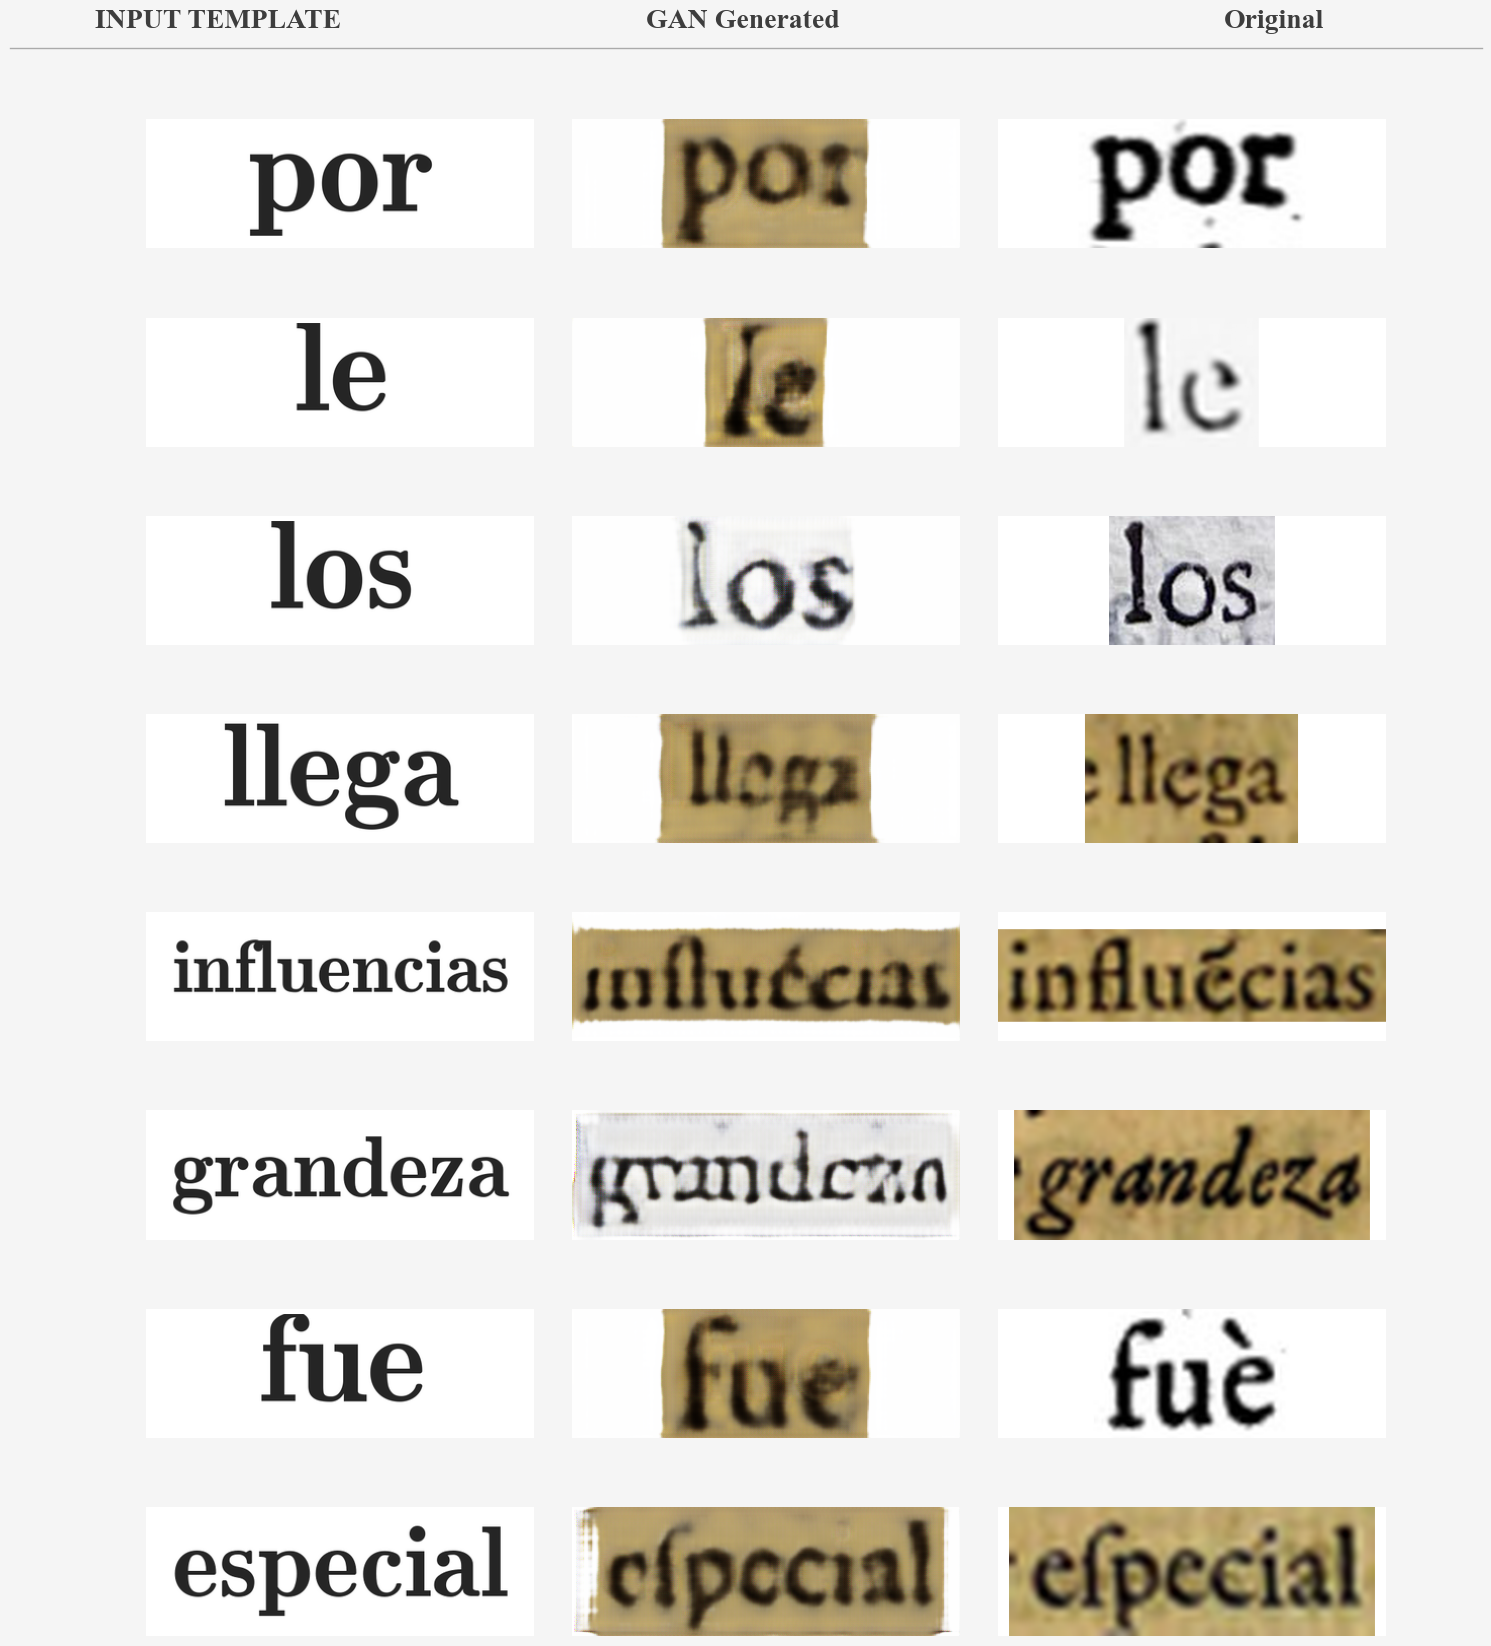

In [23]:
# Test the trained model
test(trained_generator, test_dataloader)

=== RENAISSANCE TEXT TRANSFORMATION MODEL EVALUATION ===

Metrics:
- PSNR: 28.3264 dB (Higher is better)
- SSIM: 0.8836 (Higher is better, 1.0 is perfect similarity)
- LPIPS: 0.1845 (Lower is better, perceptual similarity)
- FID: 56.8731 (Lower is better, distribution similarity)

Interpretation:
- PSNR indicates good image reconstruction quality
- SSIM indicates good structural similarity
- LPIPS indicates good perceptual similarity
- FID indicates good distribution matching

Conclusion:
Overall model performance: 83.5%

Recommendations:
- Consider adding structural consistency constraints to preserve structure

# Inference

In [25]:
def generate_renaissance_text(words, model_path, output_dir="generated_renaissance_text"):
    
    # Create output directory
    os.makedirs(output_dir, exist_ok=True)
    
    # Set device
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")
    
    # Configure matplotlib for input rendering
    matplotlib.rcParams.update({
        'text.usetex': False,
        'mathtext.fontset': 'cm',
        'font.family': 'serif',
        'font.serif': ['Times New Roman'],
        'font.weight': 'bold',
        'mathtext.bf': 'bold',
    })
   
    # Define image size
    IMG_SIZE = (128, 384)  # Height, Width
    
    # Load the trained generator
    generator = EnhancedTextGenerator().to(device)
    
    # Load the checkpoint
    checkpoint = torch.load(model_path, map_location=device)
    generator.load_state_dict(checkpoint['generator'])
    generator.eval()
    
    # Define transformations for the input images
    transform = transforms.Compose([
        transforms.Resize(IMG_SIZE),
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
    ])
    
    # Function to render the input template image
    def render_input_template(word, width=384, height=128):
        """Render text with clean styling using matplotlib"""
        # Create a figure with exact pixel dimensions
        dpi = 150
        figsize = (width/dpi, height/dpi)
        fig = plt.figure(figsize=figsize, dpi=dpi)
        
        # Create axis that fills the figure
        ax = fig.add_axes([0, 0, 1, 1])
        
        # Determine fontsize based on word length to fill the width
        base_fontsize = 70
        length_adjustment = max(1, min(15, len(word))) / 7.0
        fontsize = int(base_fontsize / length_adjustment)
        
        # Format the word with mathtext for consistent rendering
        ax.text(0.5, 0.5, word, 
                fontsize=fontsize, 
                ha='center', va='center',
                fontweight='bold',
                family='serif')
        
        ax.axis('off')
        
        # Save to a buffer
        buf = io.BytesIO()
        fig.savefig(buf, format='png', bbox_inches='tight', 
                    pad_inches=0.05, facecolor='white')
        plt.close(fig)
        buf.seek(0)
        
        # Open the buffer as an image
        img = Image.open(buf)
        img = img.convert('RGB')
        
        # Create a new white image of the exact size
        final_img = Image.new('RGB', (width, height), (255, 255, 255))
        
        # Resize the image to fill most of the frame
        img_width, img_height = img.size
        scale = min(width*0.9 / img_width, height*0.9 / img_height)
        new_width = int(img_width * scale)
        new_height = int(img_height * scale)
        
        resample_method = Image.LANCZOS if hasattr(Image, 'LANCZOS') else Image.ANTIALIAS
        resized_img = img.resize((new_width, new_height), resample_method)
        
        # Center the image
        x_offset = (width - new_width) // 2
        y_offset = (height - new_height) // 2
        
        # Paste the resized image onto the white background
        final_img.paste(resized_img, (x_offset, y_offset))
        
        return final_img
    
    # Generate images for each word
    generated_paths = []
    
    with torch.no_grad():
        for i, word in enumerate(words):
            # Create the source image (input template)
            source_img = render_input_template(word)
            
            # Save source image
            source_path = os.path.join(output_dir, f"{i}_source_{word}.png")
            source_img.save(source_path)
            
            # Preprocess source image for the model
            input_tensor = transform(source_img).unsqueeze(0).to(device)
            
            # Generate renaissance style image
            output = generator(input_tensor)
            
            # Convert the output tensor to an image
            output_img = output.squeeze(0).cpu()
            # Denormalize
            output_img = output_img * 0.5 + 0.5
            output_img = transforms.ToPILImage()(output_img)
            
            # Save the output image
            output_path = os.path.join(output_dir, f"{i}_renaissance_{word}.png")
            output_img.save(output_path)
            
            generated_paths.append((source_path, output_path))
            print(f"Generated Renaissance style for '{word}'")
    
    # Create a visualization grid for all the generated images
    num_words = len(words)
    fig, axs = plt.subplots(num_words, 2, figsize=(8, 6))
    
    # If only one word, make sure axs is 2D
    if num_words == 1:
        axs = axs.reshape(1, -1)
    
    # Add each image pair to the grid
    for i, (source_path, output_path) in enumerate(generated_paths):
        source_img = Image.open(source_path)
        output_img = Image.open(output_path)
        
        axs[i, 0].imshow(source_img)
        axs[i, 0].axis('off')
        axs[i, 1].imshow(output_img)
        axs[i, 1].axis('off')
    
    plt.tight_layout()
    summary_path = os.path.join(output_dir, "renaissance_summary.png")
    plt.show()
    # plt.savefig(summary_path, dpi=150, bbox_inches='tight')
    plt.close()
    
    return generated_paths

Using device: cuda
Generated Renaissance style for 'Renaissance'
Generated Renaissance style for 'Art'
Generated Renaissance style for 'India'


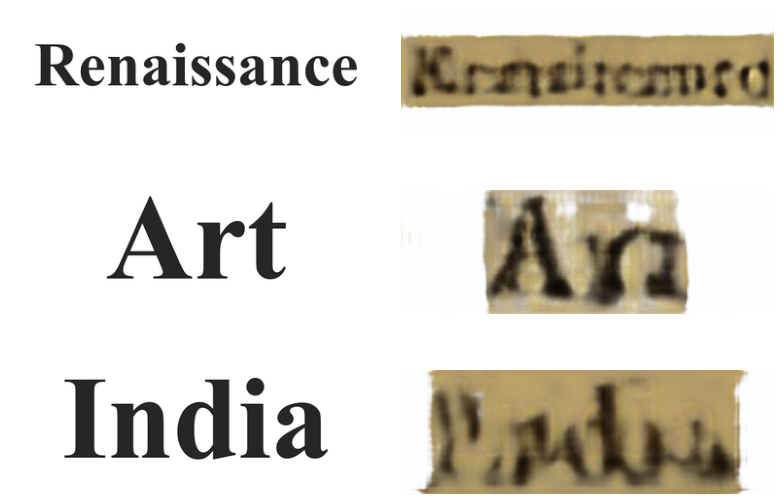

In [34]:
# Example usage
import io
words_to_generate = ["Renaissance","Art", "India"]
model_path ="GAN_output/checkpoints/best_model.pth"  # Path to your trained model
output_dir = "GAN_output/generated_text"

generated_image_paths = generate_renaissance_text(words_to_generate, model_path, output_dir)